<a href="https://colab.research.google.com/github/Falah21/TubesMachineLearning/blob/main/TubesMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Machine Learning**

PERAMAL PRIDE:
1. Ahmad Ihda Falah Annur (1206220015)
2. Marsha Trista Aulia (1206220007)
3. Talitha Rahmadewati Witanto (1206220022)

---
<br>

# 00 IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.impute import KNNImputer
import random
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import KNNImputer

import missingno as msno

In [2]:
# Data processing
import pandas as pd
import numpy as np
import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import missingno as msno

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Clustering, Evaluation support
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 01 LOAD DATASET

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Falah21/TubesMachineLearning/main/customer_segmentation.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# 02 DATA PREPROCESSING

In [4]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (2240, 29)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 1

In [5]:
# rename column
rename_dict = {
    "ID": "Customer_ID",
    "Year_Birth": "Birth_Year",
    "Education": "Education_Level",
    "Marital_Status": "Marital_Status",
    "Income": "Annual_Income",
    "Kidhome": "Kids_at_Home",
    "Teenhome": "Teens_at_Home",
    "Dt_Customer": "Customer_Since",
    "Recency": "Last_Purchase_Days",
    "MntWines": "Spending_Wines",
    "MntFruits": "Spending_Fruits",
    "MntMeatProducts": "Spending_Meat",
    "MntFishProducts": "Spending_Fish",
    "MntSweetProducts": "Spending_Sweets",
    "MntGoldProds": "Spending_Gold",
    "NumDealsPurchases": "Deals_Purchases",
    "NumWebPurchases": "Web_Purchases",
    "NumCatalogPurchases": "Catalog_Purchases",
    "NumStorePurchases": "Store_Purchases",
    "NumWebVisitsMonth": "Web_Visits_Month",
    "AcceptedCmp3": "Accepted_Campaign_3",
    "AcceptedCmp4": "Accepted_Campaign_4",
    "AcceptedCmp5": "Accepted_Campaign_5",
    "AcceptedCmp1": "Accepted_Campaign_1",
    "AcceptedCmp2": "Accepted_Campaign_2",
    "Complain": "Customer_Complaint",
    "Z_CostContact": "Contact_Cost",
    "Z_Revenue": "Revenue_Generated",
    "Response": "Last_Campaign_Response"
}

df.rename(columns=rename_dict, inplace=True)
df.head()

,Customer_ID,Birth_Year,Education_Level,Marital_Status,Annual_Income,Kids_at_Home,Teens_at_Home,Customer_Since,Last_Purchase_Days,Spending_Wines,...,Web_Visits_Month,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_1,Accepted_Campaign_2,Customer_Complaint,Contact_Cost,Revenue_Generated,Last_Campaign_Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# df['Marital_Status'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             2240 non-null   int64  
 1   Birth_Year              2240 non-null   int64  
 2   Education_Level         2240 non-null   object 
 3   Marital_Status          2240 non-null   object 
 4   Annual_Income           2216 non-null   float64
 5   Kids_at_Home            2240 non-null   int64  
 6   Teens_at_Home           2240 non-null   int64  
 7   Customer_Since          2240 non-null   object 
 8   Last_Purchase_Days      2240 non-null   int64  
 9   Spending_Wines          2240 non-null   int64  
 10  Spending_Fruits         2240 non-null   int64  
 11  Spending_Meat           2240 non-null   int64  
 12  Spending_Fish           2240 non-null   int64  
 13  Spending_Sweets         2240 non-null   int64  
 14  Spending_Gold           2240 non-null   

In [7]:
df.describe()

,Customer_ID,Birth_Year,Annual_Income,Kids_at_Home,Teens_at_Home,Last_Purchase_Days,Spending_Wines,Spending_Fruits,Spending_Meat,Spending_Fish,...,Web_Visits_Month,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_1,Accepted_Campaign_2,Customer_Complaint,Contact_Cost,Revenue_Generated,Last_Campaign_Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<Axes: >

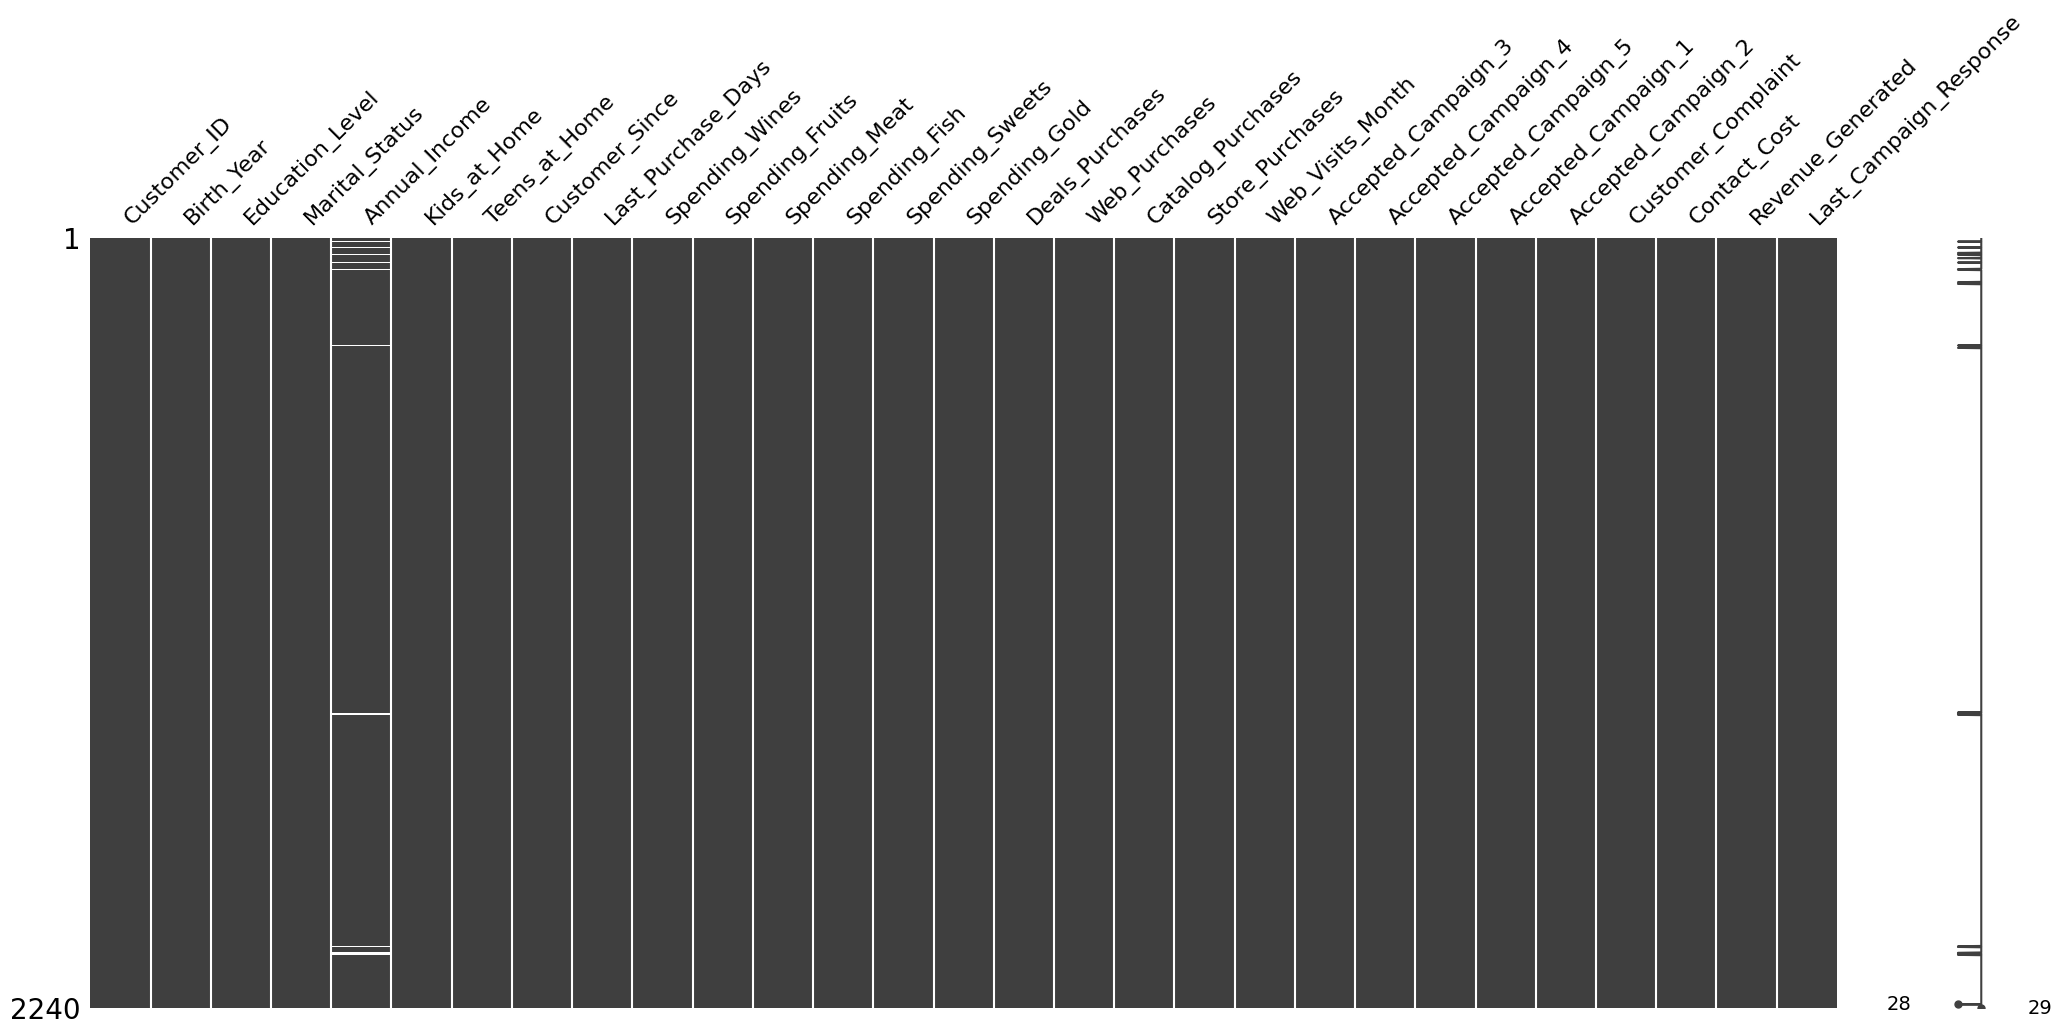

In [8]:
msno.matrix(df)

<Axes: xlabel='Annual_Income', ylabel='Count'>

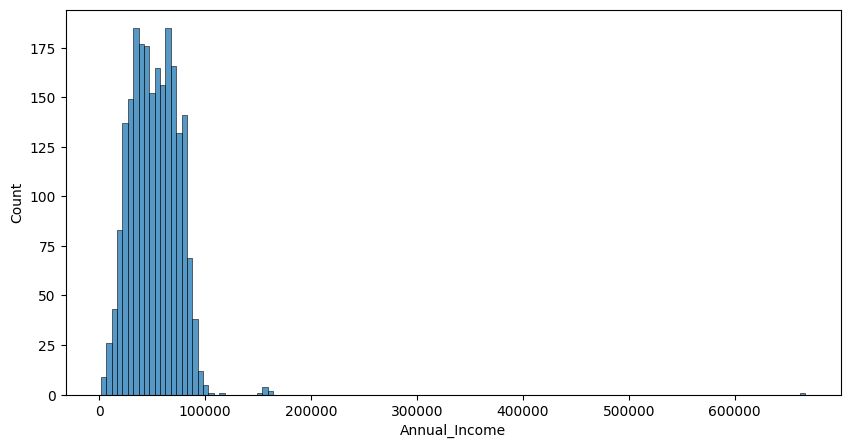

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df['Annual_Income'])

<Axes: xlabel='Annual_Income', ylabel='Count'>

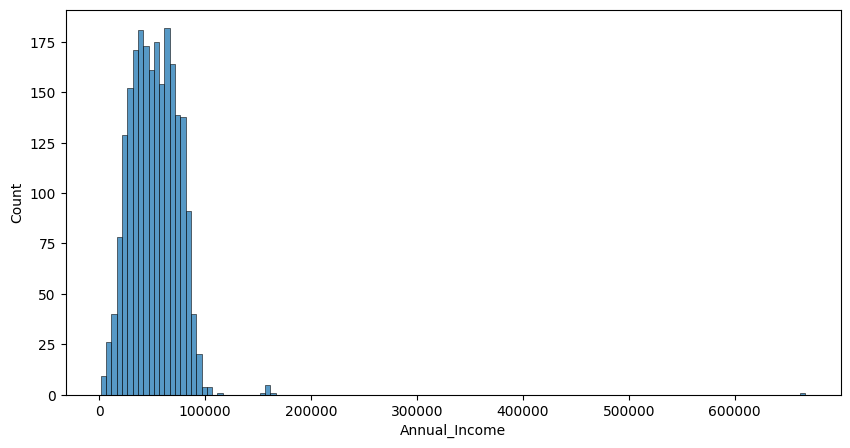

In [10]:
# FIll NaN
imputer = KNNImputer(n_neighbors=5)
df['Annual_Income'] = imputer.fit_transform(df[['Annual_Income']])

plt.figure(figsize=(10,5))
sns.histplot(df['Annual_Income'])

<Axes: >

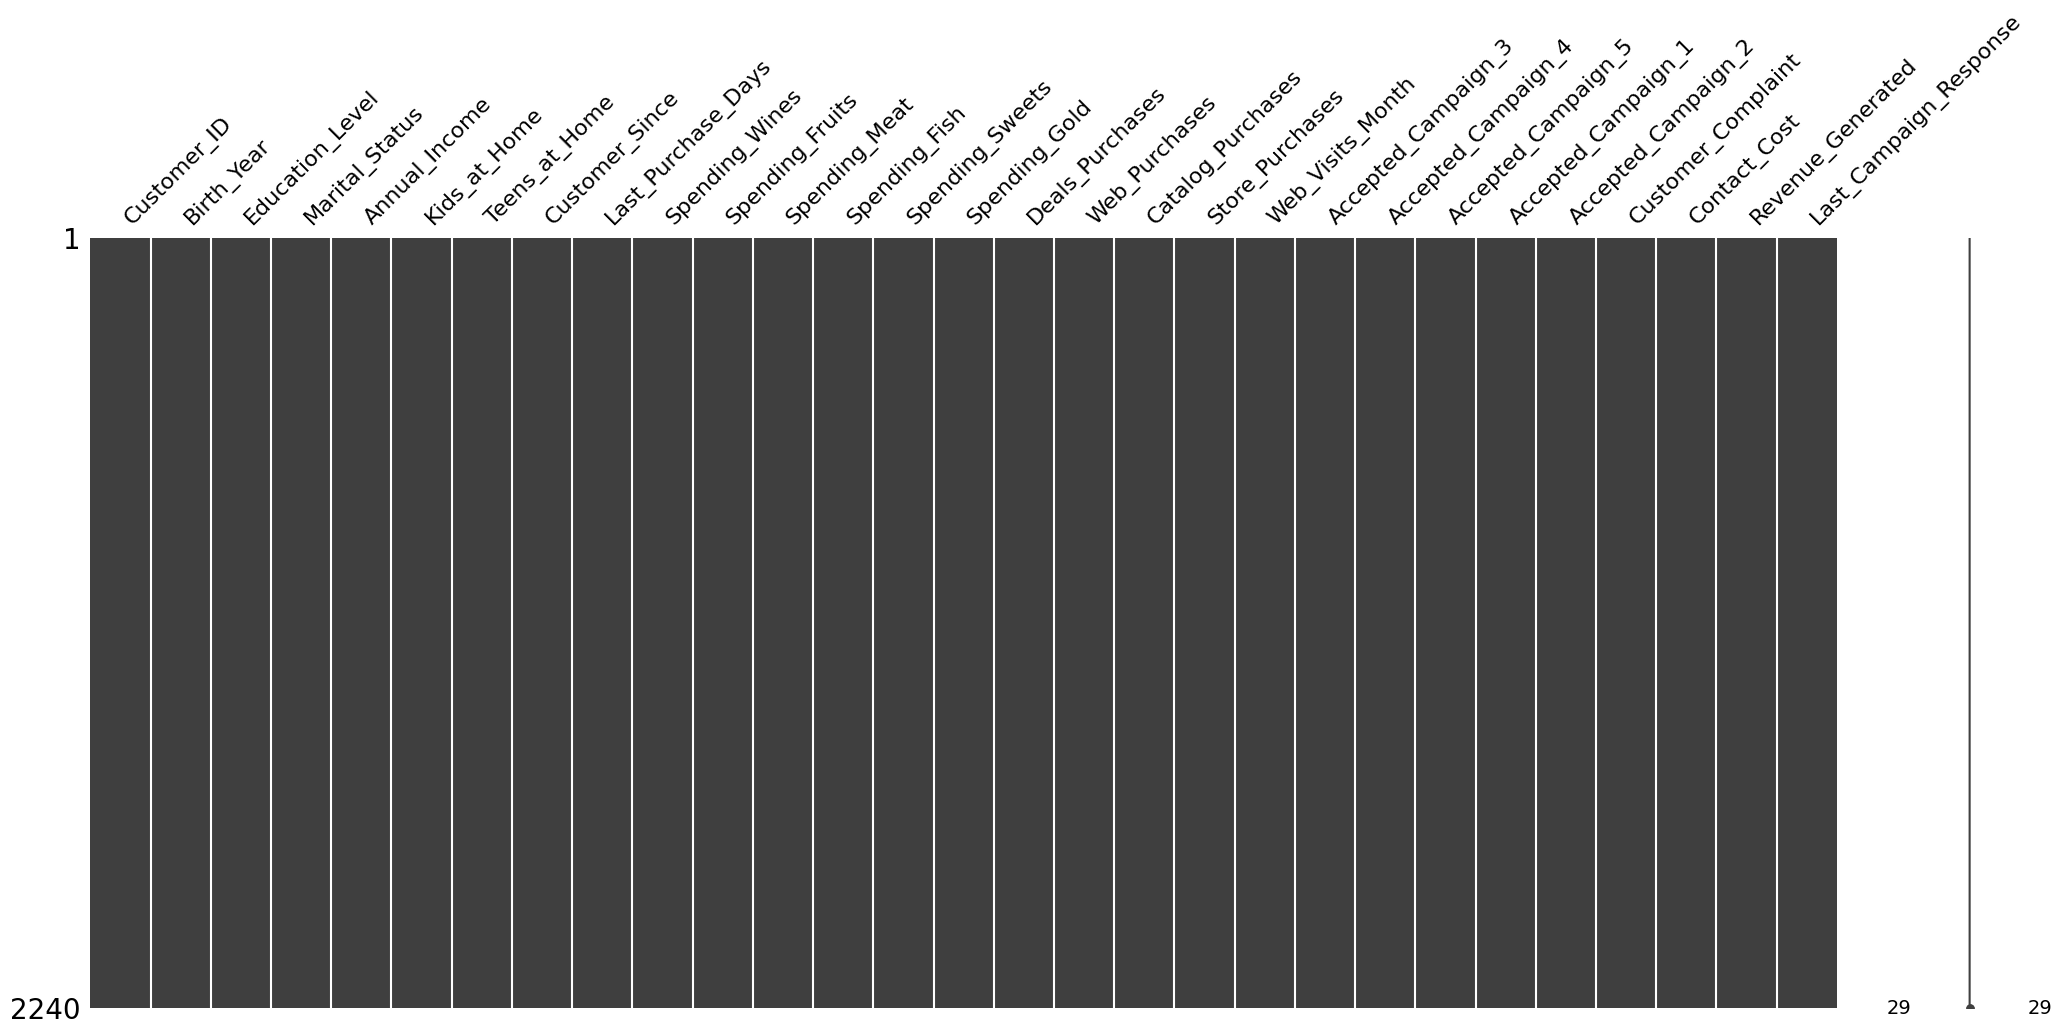

In [11]:
msno.matrix(df)

# 03 EXPLORATORY DATA ANALYSIS (EDA)

In [12]:
# Dataframe for EDA
cl_df = df.copy()

## 1. Distribusi Usia Pelanggan

In [13]:
today = datetime.date.today()
cl_df['Age'] = today.year - cl_df['Birth_Year']

avg_age = cl_df['Age'].mean() # Usia rata-rata customer
print(f'Usia rata-rata customer {avg_age}')

Usia rata-rata customer 56.19419642857143


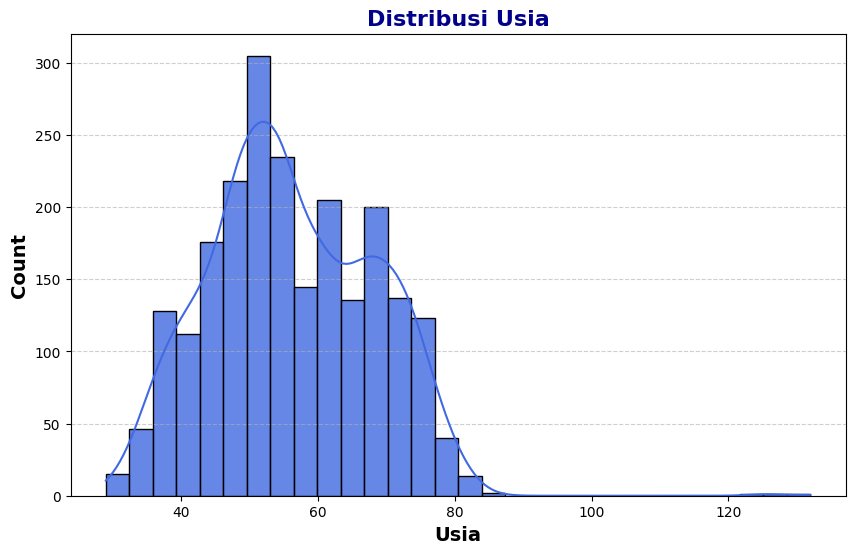

In [14]:
plt.figure(figsize=(10,6))

sns.histplot(cl_df['Age'], bins=30, kde=True, color='royalblue', edgecolor='black', alpha=0.8)

plt.title('Distribusi Usia', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Usia', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.6)

## 2. Distribusi Tingkat Pendidikan Pelanggan

In [15]:
Dist_data = df['Education_Level'].value_counts()
Dist_data = pd.DataFrame(Dist_data)
Dist_data['perc_distribution'] = Dist_data['count'] / len(df)
Dist_data

,count,perc_distribution
Education_Level,,
Graduation,1127,0.503125
PhD,486,0.216964
Master,370,0.165179
2n Cycle,203,0.090625
Basic,54,0.024107


In [16]:
color_map = px.colors.qualitative.Pastel

fig = px.pie(
    Dist_data.reset_index(),
    values='count',
    names='Education_Level',
    color_discrete_sequence=color_map,
    hole=0.3
)


fig.update_traces(
    textinfo='percent+label',
    pull=[0.1, 0, 0, 0, 0]
)

fig.update_layout(
    title={
        'text': 'Distribusi Tingkat Pendidikan',
        'x': 0.5,
        'font': {'size': 18, 'color': 'darkblue'}
    },
    legend_title="Tingkat Pendidikan",
    template="seaborn",
    width=900,
    height=600
)

fig.show()

## 3. Total Pengeluaran Berdasarkan Status Pernikahan

In [17]:
amt_spent = cl_df.groupby('Marital_Status')[['Spending_Wines', 'Spending_Fruits', 'Spending_Meat', 'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']].sum()
amt_spent['Total Amt'] = amt_spent.sum(axis=1)
amt_spent = amt_spent.sort_values(by = "Total Amt", ascending=False) #Sorting in Descending Order
amt_spent

,Spending_Wines,Spending_Fruits,Spending_Meat,Spending_Fish,Spending_Sweets,Spending_Gold,Total Amt
Marital_Status,,,,,,,
Married,258751,22235,138829,30569,23070,36999,510453
Together,177959,14703,97500,22615,15151,24937,352865
Single,138399,12881,87412,18344,13086,20990,291112
Divorced,75364,6363,34848,8130,6222,10739,141666
Widow,28434,2548,14575,3957,3004,4371,56889
Absurd,711,169,625,411,61,408,2385
YOLO,644,6,100,8,6,84,848
Alone,554,12,79,23,21,81,770


In [18]:
color_map = px.colors.qualitative.Prism

fig = px.bar(
    amt_spent.reset_index(),
    y='Total Amt',
    x='Marital_Status',
    color='Marital_Status',
    text_auto=True,
    color_discrete_sequence=color_map
)

fig.update_layout(
    title={
        'text': 'Total Belanja yang Dihabiskan Berdasarkan Status',
        'x': 0.5,
        'font': {'size': 18, 'color': 'darkblue'}
    },
    xaxis_title="Marital Status",
    yaxis_title="Total Amount Spent",
    template="seaborn",
    plot_bgcolor="rgba(0,0,0,0)",
    width = 900 ,
    height=600
)

fig.show()

## 4. Rata-rata Pendapatan Berdasarkan Tingkat Pendidikan

In [19]:
Avg_income = cl_df.groupby('Education_Level')[['Annual_Income']].mean().sort_values(by = "Annual_Income", ascending=False)
Avg_income

color_map = px.colors.qualitative.Pastel

fig = px.bar(Avg_income.reset_index(),
             x='Education_Level',
             y='Annual_Income',
             text_auto=True,
             color='Education_Level',
             color_discrete_sequence=color_map,
             )
fig.update_layout(
    title=(
        {
            'text': 'Rata-Rata Pendapatan dari Tingkat Pendidikan',
            'x': 0.5,
            'font': {'size': 18, 'color': 'darkblue'}
        }
    ),
    xaxis_title='Tingkat Pendidikan',
    yaxis_title='Rata-Rata Pendapatan',
    template='seaborn',
    width=900,
    height=600
)
fig.show()

## 5. Total Pengeluaran per Kategori Produk

In [20]:
# Hapus kolom ‘Total Amt’ dan jumlahkan pengeluaran di semua produk
product_spending = amt_spent.drop(columns=['Total Amt']).sum().to_dict()

# Ubah Dict menjadi DataFrame dengan dua kolom: 'Produk' dan 'Total Pengeluaran'
product_spending = pd.DataFrame(product_spending.items(), columns=['Product', 'Total Spending'])

# Urutkan DataFrame berdasarkan ‘Total Pengeluaran’ dalam urutan terbalik
product_spending = product_spending.sort_values(by='Total Spending', ascending=False)
product_spending

,Product,Total Spending
0,Spending_Wines,680816
2,Spending_Meat,373968
5,Spending_Gold,98609
3,Spending_Fish,84057
4,Spending_Sweets,60621
1,Spending_Fruits,58917


In [21]:
color_map = px.colors.qualitative.Set2

fig = px.bar(product_spending,
             x='Product',
             y='Total Spending',
             color='Product',
             text_auto=True,
             color_discrete_sequence=color_map)

fig.update_layout(
    title={
        'text': "Pengeluaran Total Berdasarkan Setiap Kategori Produk",
        'x': 0.5,
        'font': {'size': 18, 'color': 'darkblue'}
    },
    xaxis_title="Kategori Produk",
    yaxis_title="Pengeluaran Total",
    template="seaborn",
    width = 900 ,
    height=600
)

fig.show()

## 6. Rata-rata Total Pengeluaran per Pelanggan

In [22]:
average_spent_per_customer = cl_df.groupby('Customer_ID')[
    ['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
     'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']
].sum()

average_spent_per_customer['Total Spending'] = average_spent_per_customer.sum(axis=1)

average_spent_per_customer = average_spent_per_customer['Total Spending']
average_spent_per_customer.sort_values(ascending = False)

print(f'Rata-rata total pengeluaran tiap costumer {round(average_spent_per_customer.mean() , 2)}')

Rata-rata total pengeluaran tiap costumer 605.8


## 7. Pendapatan dan Pengeluaran pada Pelanggan Berpendapatan Tinggi

In [23]:
print(f"Pendapatan Minimum Customer =  {cl_df['Annual_Income'].min()}")
print(f"Pendapatan Maksimum Customer =  {cl_df['Annual_Income'].max()}")

# Filter customers with an annual income greater than 70K
High_income_cust = cl_df[cl_df['Annual_Income'] > 70000]

# Group by 'Customer_ID' and sum the spending across different product categories
spending_by_income = High_income_cust.groupby('Customer_ID')[
    ['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
     'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']
].sum()

High_income_cust_spending = spending_by_income.sum().sort_values(ascending=False)
High_income_cust_spending

Pendapatan Minimum Customer =  1730.0
Pendapatan Maksimum Customer =  666666.0


,0
Spending_Wines,325677
Spending_Meat,225638
Spending_Fish,45430
Spending_Gold,37212
Spending_Sweets,33973
Spending_Fruits,31445


In [24]:
# fig = px.bar(
#     High_income_cust_spending,
#     x=High_income_cust_spending.index,
#     y=High_income_cust_spending.values,
#     text_auto=True,
#     color=High_income_cust_spending.index
# )

# fig.update_layout(
#     title={
#         'text': 'Pengeluaran Total Berdasarkan Setiap Kategori Produk',
#         'x': 0.5,
#         'font': {'size': 18, 'color': 'darkblue'}
#     },
#     xaxis_title="Kategori Produk",
#     yaxis_title="Pengeluaran Total",
#     template="seaborn",
#     width=900,
#     height=600
# )

# fig.show()

## 8. Perbandingan Pembelian Online dan Offline

### a. Berdasarkan Pendidikan

In [25]:
web_store_purc_ED = cl_df.groupby('Education_Level')[['Web_Purchases' ,
                                                'Store_Purchases']].sum().sort_values(by = 'Web_Purchases' , ascending=False)

In [26]:
web_store_purc_ED

,Web_Purchases,Store_Purchases
Education_Level,,
Graduation,4649,6570
PhD,2150,2946
Master,1492,2182
2n Cycle,757,1118
Basic,102,154


### b. Berdasarkan Status Pernikahan

In [27]:
web_store_purc_MS = cl_df.groupby('Marital_Status')[['Web_Purchases' ,
                                                'Store_Purchases']].sum().sort_values(by = 'Web_Purchases' , ascending=False)

In [28]:
web_store_purc_ED

,Web_Purchases,Store_Purchases
Education_Level,,
Graduation,4649,6570
PhD,2150,2946
Master,1492,2182
2n Cycle,757,1118
Basic,102,154


In [29]:
web_store_purc_MS

,Web_Purchases,Store_Purchases
Marital_Status,,
Married,3532,5055
Together,2367,3327
Single,1859,2707
Divorced,1000,1350
Widow,356,494
Alone,15,12
YOLO,14,12
Absurd,7,13


In [30]:
fig = px.bar(
    web_store_purc_ED.reset_index(),
    x="Education_Level",
    y=["Web_Purchases", "Store_Purchases"],
    barmode='group',
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(
    title={
        'text' : 'Jumlah Pembelian di Web dan di Toko Berdasarkan Pendidikan',
        'x': 0.5,
        'font': {'size': 18, 'color': 'darkblue'}
    },
    xaxis_title="Pendidikan",
    yaxis_title="Jumlah Pembelian",
    template="seaborn",
    width=1000,
    height=600
)

fig.show()

## Tipe Pembeli: One-Time vs Repeat Buyers

In [31]:
purchases_per_customer = cl_df.groupby('Customer_ID')[["Web_Purchases", "Store_Purchases"]].sum()
purchases_per_customer= purchases_per_customer.sum(axis = 1).rename('Total Purchases')

one_time_buyers = purchases_per_customer[purchases_per_customer == 1]
repeat_buyers = purchases_per_customer[purchases_per_customer > 1]

print(f'Jumlah Pembeli Satu Kali: {len(one_time_buyers)}')
print(f'Jumlah Pembeli Ulang (lebih dari satu kali): {len(repeat_buyers)}')

Jumlah Pembeli Satu Kali: 6
Jumlah Pembeli Ulang (lebih dari satu kali): 2224


## Korelasi Jumlah Pembelian dan Total Pengeluaran

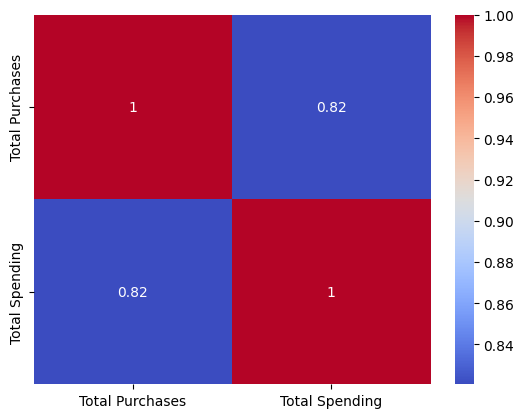

In [32]:
cl_df['Total Spending'] = cl_df[['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
                                 'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']].sum(axis=1)

cl_df['Total Purchases'] = cl_df[['Catalog_Purchases', 'Web_Purchases', 'Store_Purchases']].sum(axis=1)
corr_df = cl_df[['Total Purchases', 'Total Spending']].corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.show()

In [33]:
fig = px.scatter(
    cl_df,
    x="Total Purchases",
    y="Total Spending",
    color="Total Spending",
    color_continuous_scale="blues",
    size_max=10,
    opacity=0.7,
    trendline="ols",
    title="Hubungan antara Frekuensi Pembelian dan Total Pengeluaran",
    labels={
        "Total Purchases": "Jumlah Pembelian",
        "Total Spending": "Total Pengeluaran"
    }
)

fig.update_layout(
    title={
        'x': 0.5,
        'font': {'size': 18, 'color': 'darkblue'}
    },
    xaxis_title="Jumlah Pembelian",
    yaxis_title="Total Pengeluaran",
    template="plotly_white",
    width=1000,
    height=600,
    coloraxis_colorbar=dict(title="Tingkat Pengeluaran")
)

fig.show()

## Distribusi Recency (Hari Sejak Pembelian Terakhir)

Resensi minimum dari seorang pelanggan adalah 0 hari
Resensi maksimum dari seorang pelanggan adalah 99 hari


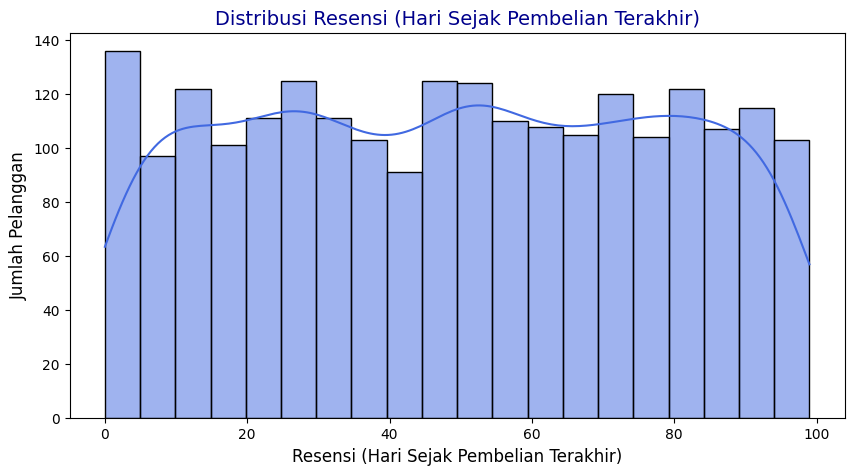

In [34]:
print(f'Resensi minimum dari seorang pelanggan adalah {cl_df["Last_Purchase_Days"].min()} hari')
print(f'Resensi maksimum dari seorang pelanggan adalah {cl_df["Last_Purchase_Days"].max()} hari')

plt.figure(figsize=(10, 5))
sns.histplot(cl_df['Last_Purchase_Days'], bins=20, kde=True, color="royalblue", edgecolor="black")

plt.xlabel("Resensi (Hari Sejak Pembelian Terakhir)", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)
plt.title("Distribusi Resensi (Hari Sejak Pembelian Terakhir)", fontsize=14, color="darkblue")

plt.show()

### Pelanggan Tidak Aktif

In [35]:
# Pelanggan dengan resensi lebih dari 50 hari dianggap belum melakukan pembelian terbaru
recent_purchase_cust = cl_df[cl_df['Last_Purchase_Days'] > 50]

print(f'Jumlah pelanggan yang belum melakukan pembelian terbaru adalah {len(recent_purchase_cust)}')

Jumlah pelanggan yang belum melakukan pembelian terbaru adalah 1096


## Identifikasi Pelanggan Loyal

In [36]:
"""
  1. Pelanggan aktif yang memiliki resensi (Last_Purchase_Days) kurang dari 25 hari,
  2. Jumlah pembelian oleh pelanggan lebih dari 18 kali,
  3. Total pengeluaran lebih dari 1500.
"""

# Menyaring pelanggan yang memenuhi ketiga kriteria loyalitas
Pelanggan_loyal = cl_df[(cl_df['Last_Purchase_Days'] < 25) &
                        (cl_df['Total Purchases'] > 18) &
                        (cl_df['Total Spending'] > 1500)]
Pelanggan_loyal.head()

,Customer_ID,Birth_Year,Education_Level,Marital_Status,Annual_Income,Kids_at_Home,Teens_at_Home,Customer_Since,Last_Purchase_Days,Spending_Wines,...,Accepted_Campaign_5,Accepted_Campaign_1,Accepted_Campaign_2,Customer_Complaint,Contact_Cost,Revenue_Generated,Last_Campaign_Response,Age,Total Spending,Total Purchases
51,4114,1964,Master,Married,79143.0,0,0,11-08-2012,2,650,...,0,0,0,0,3,11,0,61,1693,28
161,9260,1945,PhD,Married,70356.0,0,0,05-11-2012,20,1349,...,0,0,0,0,3,11,0,80,1706,25
188,6982,1976,Graduation,Married,74068.0,0,0,19-03-2013,14,783,...,0,0,0,0,3,11,0,49,1581,23
209,380,1954,Graduation,Divorced,64497.0,0,1,10-09-2012,17,1170,...,0,0,0,0,3,11,1,71,1804,24
243,9529,1990,Graduation,Married,73687.0,0,0,28-11-2013,8,559,...,0,1,0,0,3,11,1,35,1627,21


### Pelanggan yang Memiliki Anak

In [37]:
# Mengambil hanya pelanggan yang memiliki anak di rumah
Customers_with_kids_spending = cl_df[cl_df['Kids_at_Home'] > 0]

fitur_pengeluaran = ['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
                     'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']

pengeluaran_pelanggan_dengan_anak = Customers_with_kids_spending.groupby('Customer_ID')[fitur_pengeluaran].sum()
pengeluaran_pelanggan_dengan_anak = pengeluaran_pelanggan_dengan_anak.sum().sort_values(ascending=False).rename('Total Pengeluaran')
pengeluaran_pelanggan_dengan_anak

,Total Pengeluaran
Spending_Wines,97449
Spending_Meat,45551
Spending_Gold,20981
Spending_Fish,11439
Spending_Sweets,8256
Spending_Fruits,7982


In [38]:
col_names = pengeluaran_pelanggan_dengan_anak.index
values = pengeluaran_pelanggan_dengan_anak.values

fig = px.bar(
    x = col_names,
    y = values,
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Set2,
    color = col_names
)

fig.update_layout(
    title={
        'text': 'Kategori Pengeluaran Pelanggan yang Memiliki Anak',
        'x': 0.5,
        'font': {'size': 18, 'color': 'darkblue'}
    },
    xaxis_title="Kategori Pengeluaran",
    yaxis_title="Total Pengeluaran",
    template="seaborn",
    width=1000,
    height=600
)

fig.show()

### Segmentasi Pelanggan menggunakan RFM

In [39]:
today = pd.Timestamp("2025-04-01")

if 'LastPurchaseDate' not in cl_df.columns:
    cl_df['LastPurchaseDate'] = pd.to_datetime(cl_df['Customer_Since'], errors='coerce')

rfm = cl_df.copy()

# Hitung nilai RFM
rfm['Recency'] = (today - rfm['LastPurchaseDate']).dt.days  # Jumlah hari sejak pembelian terakhir
rfm['Frequency'] = rfm[['Web_Purchases', 'Catalog_Purchases', 'Store_Purchases']].sum(axis=1)  # Jumlah pembelian
rfm['Monetary'] = rfm[['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
                       'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']].sum(axis=1)  # Total pengeluaran

# Hapus data yang tidak memiliki nilai recency
rfm = rfm.dropna(subset=['Recency'])

# Skoring RFM (1 = buruk, 5 = terbaik)
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)  # Semakin baru, skor makin tinggi
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)  # Semakin sering, skor makin tinggi
rfm['M'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)  # Semakin besar pengeluaran, skor makin tinggi

# Gabungkan skor RFM menjadi satu kolom
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Fungsi segmentasi berdasarkan skor RFM
def segment(rfm_score):
    if rfm_score >= '555': return 'Juara'  # Champions
    elif rfm_score >= '444': return 'Pelanggan Loyal'
    elif rfm_score >= '344': return 'Calon Loyalis'
    elif rfm_score >= '244': return 'Butuh Perhatian'
    elif rfm_score >= '144': return 'Berisiko'
    else: return 'Pelanggan Hilang'

rfm['Segment'] = rfm['RFM_Score'].apply(segment)

segment_summary = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer_ID': 'count'
}).rename(columns={
    'Customer_ID': 'Jumlah Pelanggan',
    'Recency': 'Rata-rata Recency',
    'Frequency': 'Rata-rata Frequency',
    'Monetary': 'Rata-rata Monetary'
}).sort_values(by='Rata-rata Monetary', ascending=False)

segment_summary

,Rata-rata Recency,Rata-rata Frequency,Rata-rata Monetary,Jumlah Pelanggan
Segment,,,,
Juara,3890.363636,22.000000,1693.636364,11
Berisiko,4532.329670,13.505495,706.730769,182
Butuh Perhatian,4354.494898,13.234694,645.198980,196
Pelanggan Loyal,3957.995595,12.718062,625.268722,227
Calon Loyalis,4204.067010,12.731959,608.051546,194
Pelanggan Hilang,4679.669811,8.745283,310.150943,106


<ipython-input-40-2504697404>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




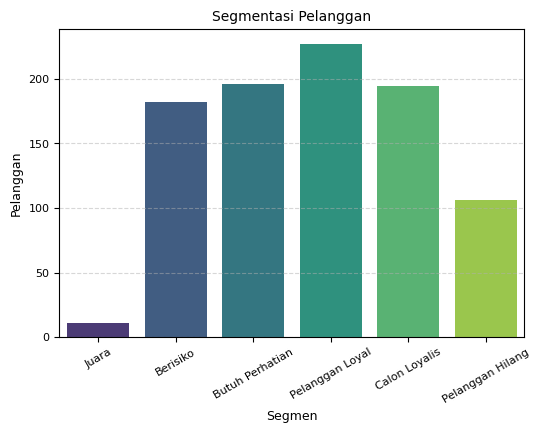

In [40]:
plt.figure(figsize=(6, 4))
sns.barplot(x=segment_summary.index, y=segment_summary['Jumlah Pelanggan'], palette="viridis")

plt.title("Segmentasi Pelanggan", fontsize=10)
plt.xlabel("Segmen", fontsize=9)
plt.ylabel("Pelanggan", fontsize=9)
plt.xticks(rotation=30, fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

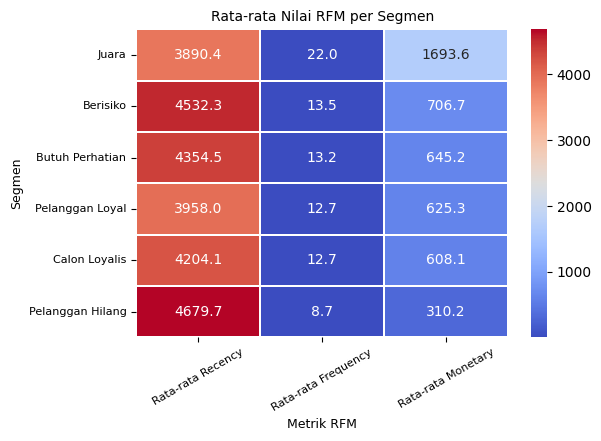

In [41]:
plt.figure(figsize=(6, 4))
sns.heatmap(segment_summary.drop(columns=['Jumlah Pelanggan']), cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.3)

plt.title("Rata-rata Nilai RFM per Segmen", fontsize=10)
plt.xlabel("Metrik RFM", fontsize=9)
plt.ylabel("Segmen", fontsize=9)
plt.xticks(rotation=30, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

## Distribusi dan Pembersihan Outlier pada Pendapatan

,Annual_Income
count,2232.000000
mean,51640.236126
std,20601.760369
min,1730.000000
25%,35434.750000
50%,51566.000000
75%,68118.000000
max,113734.000000


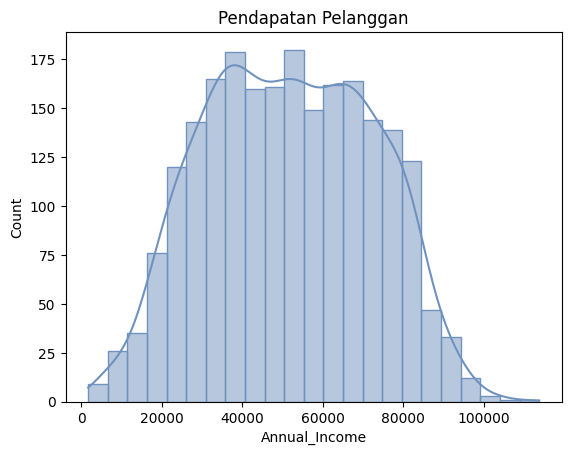

In [42]:
Q1 = df['Annual_Income'].quantile(0.25)
Q3 = df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Annual_Income'] >= lower_bound) & (df['Annual_Income'] <= upper_bound)]

x = df['Annual_Income']

col = '#7092BE'
sns.histplot(x, kde=True, color=col, edgecolor=col)
plt.title('Pendapatan Pelanggan')
pd.DataFrame(x.describe())

## Histogram Pengeluaran Produk oleh Pelanggan

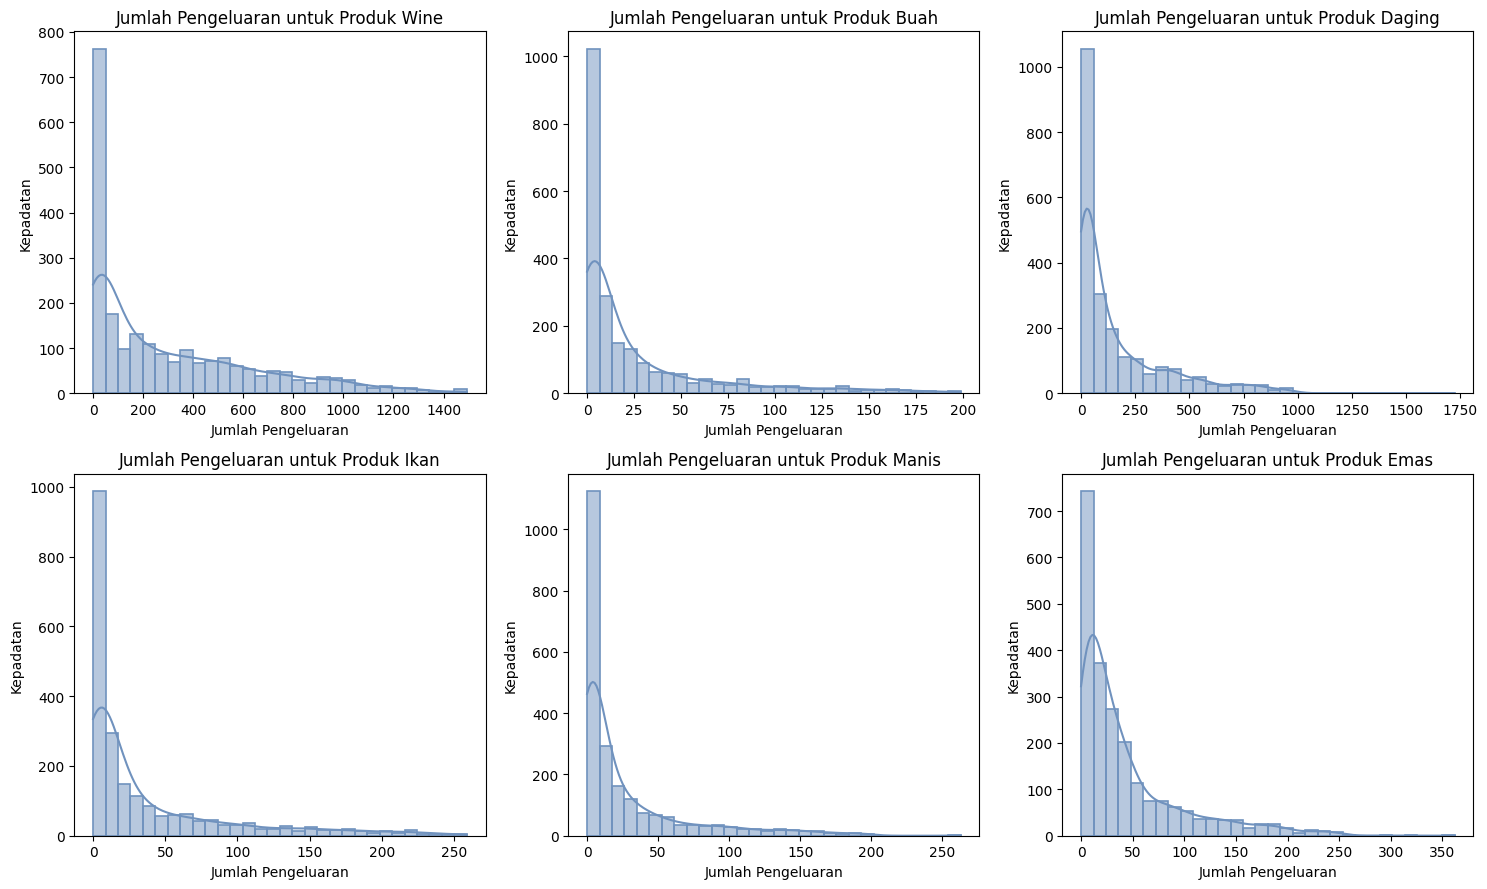

In [43]:
# Memisahkan masing-masing kategori pengeluaran
win = df['Spending_Wines']
fruit = df['Spending_Fruits']
meat = df['Spending_Meat']
fish = df['Spending_Fish']
sweet = df['Spending_Sweets']
gold = df['Spending_Gold']

data_list = [win, fruit, meat, fish, sweet, gold]
titles = [
    'Jumlah Pengeluaran untuk Produk Wine',
    'Jumlah Pengeluaran untuk Produk Buah',
    'Jumlah Pengeluaran untuk Produk Daging',
    'Jumlah Pengeluaran untuk Produk Ikan',
    'Jumlah Pengeluaran untuk Produk Manis',
    'Jumlah Pengeluaran untuk Produk Emas'
]

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
col = '#7092BE'
edge_col = '#7092BE'

axes = axes.flatten()

for i, (data, title) in enumerate(zip(data_list, titles)):
    sns.histplot(data, bins=30, kde=True, ax=axes[i],
                 color=col, edgecolor=edge_col, linewidth=1.2)

    axes[i].set_title(title)
    axes[i].set_xlabel('Jumlah Pengeluaran')
    axes[i].set_ylabel('Kepadatan')

plt.tight_layout()
plt.show()

## Penerimaan Kampanye Pemasaran

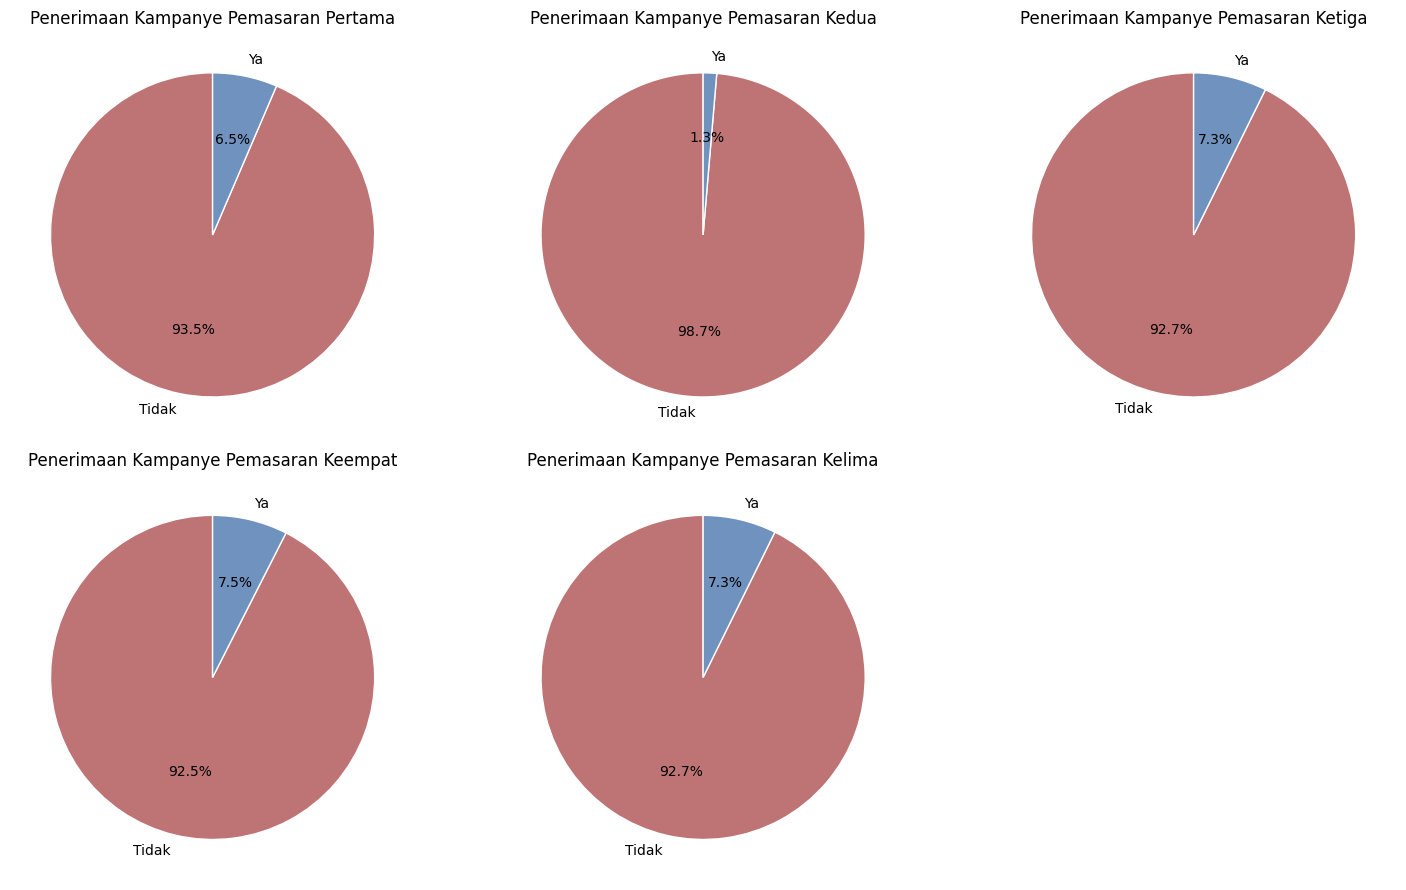

In [44]:
mp1 = df['Accepted_Campaign_1'].value_counts()
mp2 = df['Accepted_Campaign_2'].value_counts()
mp3 = df['Accepted_Campaign_3'].value_counts()
mp4 = df['Accepted_Campaign_4'].value_counts()
mp5 = df['Accepted_Campaign_5'].value_counts()

data_list = [mp1, mp2, mp3, mp4, mp5]
titles = [
    'Penerimaan Kampanye Pemasaran Pertama',
    'Penerimaan Kampanye Pemasaran Kedua',
    'Penerimaan Kampanye Pemasaran Ketiga',
    'Penerimaan Kampanye Pemasaran Keempat',
    'Penerimaan Kampanye Pemasaran Kelima'
]

max_color = '#BE7475'
min_color = '#7092BE'

def get_pie_colors(values, max_color, min_color):
    return [max_color if v == values.max() else min_color for v in values]

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()

for i, (data, title) in enumerate(zip(data_list, titles)):
    colors = get_pie_colors(data, max_color, min_color)
    labels = ['Ya' if i == 1 else 'Tidak' for i in data.index]  # 1 = Ya, 0 = Tidak

    axes[i].pie(data.values,
                labels=labels,
                autopct='%1.1f%%',
                startangle=90,
                colors=colors,
                wedgeprops={'edgecolor': 'white'})
    axes[i].set_title(title)

# Hapus subplot kosong ke-6
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## Keluhan Pelanggan dan Respons terhadap Kampanye

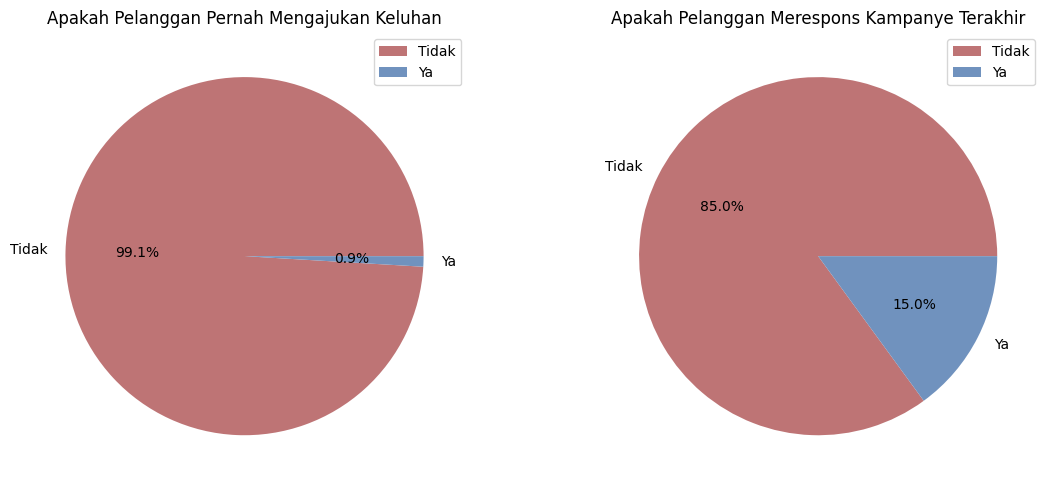

In [45]:
x1 = df['Customer_Complaint'].value_counts()
labels1 = ['Ya' if i == 1 else 'Tidak' for i in x1.index]
colors = ['#BE7475', '#7092BE']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(x1, labels=labels1, autopct='%1.1f%%', colors=colors)
plt.title('Apakah Pelanggan Pernah Mengajukan Keluhan')
plt.legend(labels1)

x2 = df['Last_Campaign_Response'].value_counts()
labels2 = ['Ya' if i == 1 else 'Tidak' for i in x2.index]

plt.subplot(1, 2, 2)
plt.pie(x2, labels=labels2, autopct='%1.1f%%', colors=colors)
plt.title('Apakah Pelanggan Merespons Kampanye Terakhir')
plt.legend(labels2)

plt.tight_layout()
plt.show()

## Korelasi

In [46]:
# df['Contact_Cost'].unique()

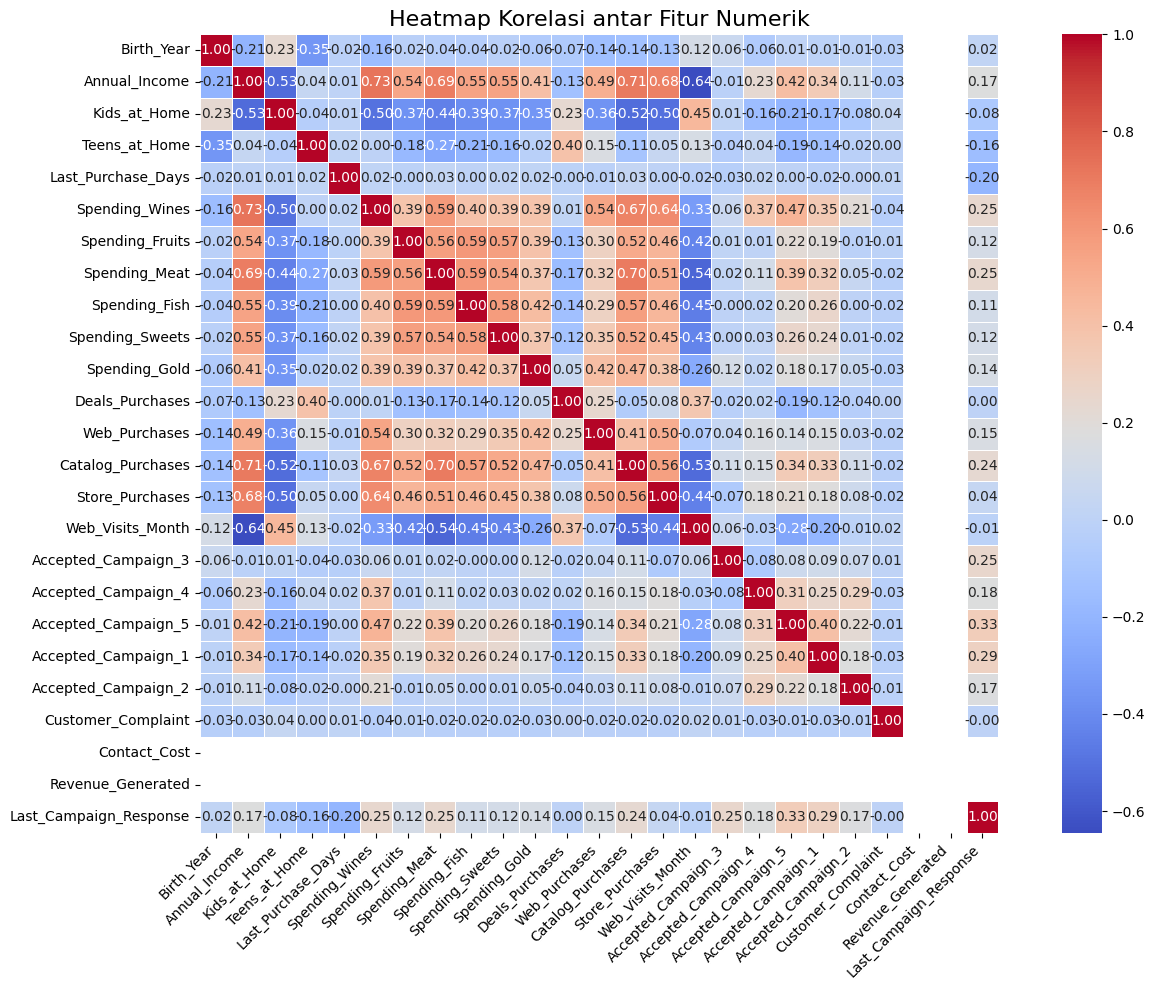

In [47]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer_ID']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title("Heatmap Korelasi antar Fitur Numerik", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [48]:
threshold = 0.4

# Pilih fitur numerik, kecuali ID
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer_ID']).columns

# Hitung korelasi
corr_matrix = df[numeric_cols].corr()

strong_corrs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        var1 = corr_matrix.columns[i]
        var2 = corr_matrix.columns[j]
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) >= threshold:
            strong_corrs.append((var1, var2, corr_value))

# Urutkan berdasarkan kekuatan korelasi (dari tinggi ke rendah)
strong_corrs = sorted(strong_corrs, key=lambda x: abs(x[2]), reverse=True)

print("Pasangan fitur dengan korelasi cukup kuat (|r| ≥", threshold, "):\n")
for var1, var2, corr in strong_corrs:
    print(f"- {var1} vs {var2}: korelasi = {corr:.2f}")


Pasangan fitur dengan korelasi cukup kuat (|r| ≥ 0.4 ):

- Annual_Income vs Spending_Wines: korelasi = 0.73
- Annual_Income vs Catalog_Purchases: korelasi = 0.71
- Spending_Meat vs Catalog_Purchases: korelasi = 0.70
- Annual_Income vs Spending_Meat: korelasi = 0.69
- Annual_Income vs Store_Purchases: korelasi = 0.68
- Spending_Wines vs Catalog_Purchases: korelasi = 0.67
- Annual_Income vs Web_Visits_Month: korelasi = -0.64
- Spending_Wines vs Store_Purchases: korelasi = 0.64
- Spending_Fruits vs Spending_Fish: korelasi = 0.59
- Spending_Meat vs Spending_Fish: korelasi = 0.59
- Spending_Wines vs Spending_Meat: korelasi = 0.59
- Spending_Fish vs Spending_Sweets: korelasi = 0.58
- Spending_Fruits vs Spending_Sweets: korelasi = 0.57
- Spending_Fish vs Catalog_Purchases: korelasi = 0.57
- Spending_Fruits vs Spending_Meat: korelasi = 0.56
- Catalog_Purchases vs Store_Purchases: korelasi = 0.56
- Annual_Income vs Spending_Fish: korelasi = 0.55
- Annual_Income vs Spending_Sweets: korelasi = 0.

# 04 MODELING

In [49]:
from sklearn.preprocessing import LabelEncoder
df = df.copy()
encoder = LabelEncoder()

df['Education_Level'] = encoder.fit_transform(df['Education_Level'])
df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])

In [50]:
df['Purchases'] = df['Spending_Wines'] + df['Spending_Fruits'] + df['Spending_Meat'] + df['Spending_Fish'] + df['Spending_Sweets'] + df['Spending_Gold']

In [51]:
df.head()

,Customer_ID,Birth_Year,Education_Level,Marital_Status,Annual_Income,Kids_at_Home,Teens_at_Home,Customer_Since,Last_Purchase_Days,Spending_Wines,...,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_1,Accepted_Campaign_2,Customer_Complaint,Contact_Cost,Revenue_Generated,Last_Campaign_Response,Purchases
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,4,3,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,422


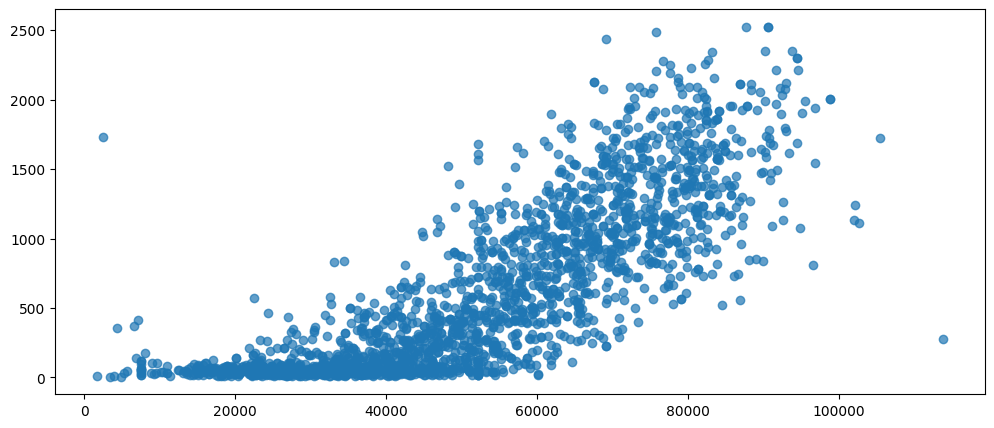

In [52]:
plt.figure(figsize=(12, 5))

plt.scatter(df['Annual_Income'], df['Purchases'], alpha=0.7)
plt.show()

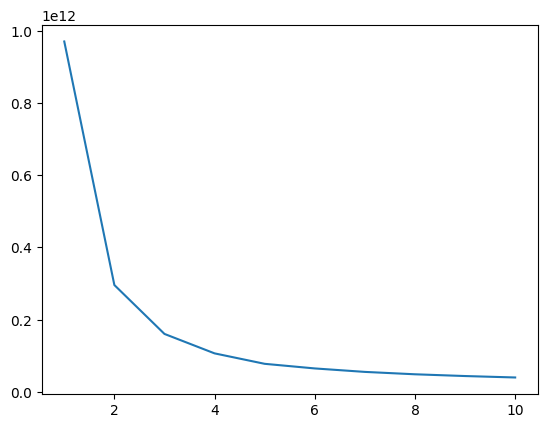

In [53]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=3000, random_state=42)
    df_numeric = df.select_dtypes(include=np.number)
    kmeans.fit(df_numeric)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.show()

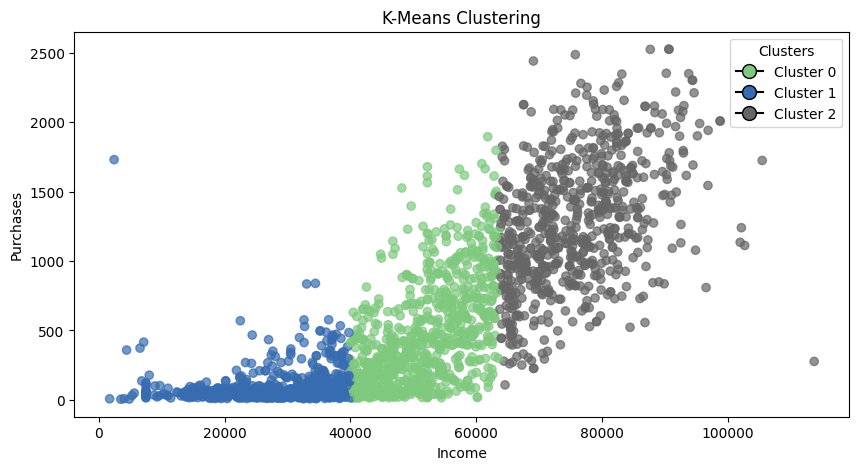

In [54]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

# Select only numerical columns for KMeans
df_numeric = df.select_dtypes(include=np.number)

# Fit and predict using only numerical columns
kmeans_labels = kmeans.fit_predict(df_numeric)

# Visualize K-Means clustering
plt.figure(figsize=(10, 5))

# Create a scatter plot (make sure 'Income' and 'Purchases' are in df_numeric or accessible)
# Assuming 'Income' and 'Purchases' are numerical and present in df_numeric after selection
scatter = plt.scatter(df_numeric['Annual_Income'], df_numeric['Purchases'], c=kmeans_labels, cmap='Accent', alpha=0.7)

# Create custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='black', label=f'Cluster {i}',
                           markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
                   for i in range(3)]
plt.legend(handles=legend_elements, title='Clusters')

plt.title('K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Purchases')
plt.show()

## Silhouette Score

In [55]:
df_sil = df.copy()

k	Silhouette Score
2	0.5890
3	0.4753
4	0.4408
5	0.4076
6	0.3806
7	0.3806
8	0.3819
9	0.3851
10	0.3739


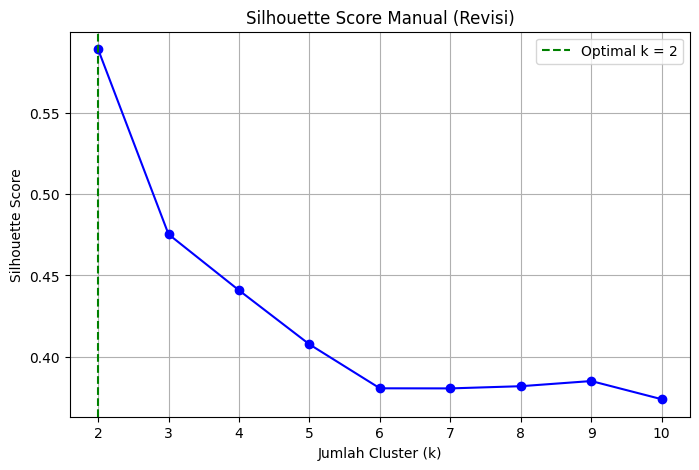

Nilai k optimal berdasarkan Silhouette Score (manual) adalah: 2


In [56]:
X = df_sil[['Annual_Income', 'Purchases']].values
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# KMeans manual
def kmeans_manual(X, k, max_iter=100):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([
            X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else centroids[i]
            for i in range(k)
        ])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels

# Silhouette manual (versi revisi)
def silhouette_manual(X, labels):
    n = len(X)
    unique_labels = np.unique(labels)
    silhouette_scores = []

    for i in range(n):
        xi = X[i]
        own_cluster = labels[i]

        # a(i): rata-rata jarak ke anggota cluster sendiri (selain dirinya)
        same_cluster = (labels == own_cluster)
        same_cluster[i] = False  # kecualikan dirinya sendiri

        if np.sum(same_cluster) == 0:
            a_i = 0  # jika hanya 1 anggota di cluster
        else:
            a_i = np.mean(np.linalg.norm(xi - X[same_cluster], axis=1))

        # b(i): minimum dari rata-rata jarak ke cluster lain
        b_i = np.inf
        for other_label in unique_labels:
            if other_label == own_cluster:
                continue
            other_cluster = (labels == other_label)
            dist_to_other = np.mean(np.linalg.norm(xi - X[other_cluster], axis=1))
            b_i = min(b_i, dist_to_other)

        # s(i)
        if max(a_i, b_i) == 0:
            s_i = 0
        else:
            s_i = (b_i - a_i) / max(a_i, b_i)
        silhouette_scores.append(s_i)

    return np.mean(silhouette_scores)

# Jalankan untuk k = 2 sampai 10
K_range = range(2, 11)
silhouette_vals = []

for k in K_range:
    labels = kmeans_manual(X_scaled, k)
    score = silhouette_manual(X_scaled, labels)
    silhouette_vals.append(score)

# Tampilkan hasil
print("k\tSilhouette Score")
for k, score in zip(K_range, silhouette_vals):
    print(f"{k}\t{score:.4f}")

# Cari k terbaik
optimal_k = K_range[np.argmax(silhouette_vals)]

# Visualisasi
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_vals, 'bo-')
plt.axvline(optimal_k, color='green', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Manual (Revisi)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Nilai k optimal berdasarkan Silhouette Score (manual) adalah: {optimal_k}")

## Elbow Methode

k	Inertia
1	4464.0000
2	1366.9188
3	861.3117
4	590.1480
5	477.1810
6	406.6624
7	353.7107
8	322.4137
9	277.0320
10	254.3147


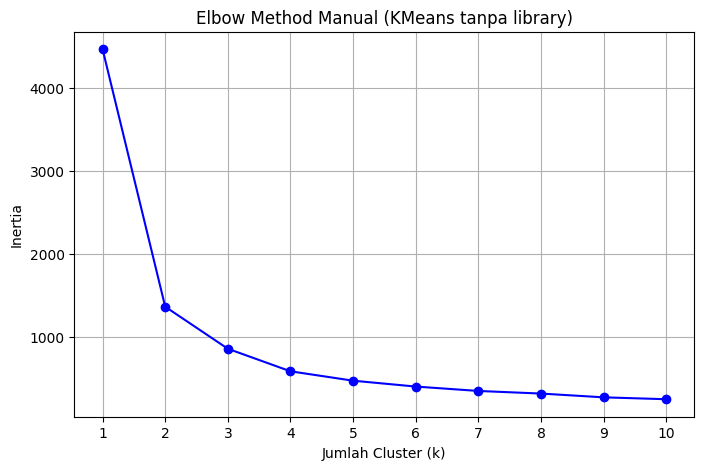

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Ambil data
X = df_sil[['Annual_Income', 'Purchases']].values

# Standarisasi manual (Z-score)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# Fungsi manual untuk menghitung inertia
def compute_inertia(X, centroids, labels):
    inertia = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia

# Fungsi KMeans manual
def kmeans_manual(X, k, max_iter=100):
    np.random.seed(42)
    # Inisialisasi centroid secara acak dari data
    initial_indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[initial_indices]

    for _ in range(max_iter):
        # Hitung jarak ke semua centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        # Assign ke centroid terdekat
        labels = np.argmin(distances, axis=1)
        # Update centroid
        new_centroids = np.array([X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else centroids[i] for i in range(k)])

        # Jika tidak berubah, selesai
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    inertia = compute_inertia(X, centroids, labels)
    return inertia

# Hitung inertia untuk berbagai k
K_range = range(1, 11)
inertia_scores = []

for k in K_range:
    inertia = kmeans_manual(X_scaled, k)
    inertia_scores.append(inertia)

# Tampilkan nilai k dan inertia-nya
print("k\tInertia")
for k, score in zip(K_range, inertia_scores):
    print(f"{k}\t{score:.4f}")

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_scores, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method Manual (KMeans tanpa library)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

## Implementasi K-Means

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Ambil data numerik dan fitur yang dipakai
df_numeric = df.select_dtypes(include=np.number)
X = df_numeric[['Annual_Income', 'Purchases']].values

# 2. Parameter
k = 2
max_iter = 100
np.random.seed(42)

# --- Fungsi Euclidean ---
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# 3. Inisialisasi centroid secara acak dari data
random_indices = np.random.choice(X.shape[0], size=k, replace=False)
centroids = X[random_indices]
print(f"Centroid awal:\n{centroids}\n")

# 4. Iterasi K-Means
for iteration in range(max_iter):
    print(f"Iterasi ke-{iteration + 1}")

    # a. Hitung jarak setiap titik ke setiap centroid
    distances = np.zeros((X.shape[0], k))
    for i, x in enumerate(X):
        for j, centroid in enumerate(centroids):
            distances[i, j] = euclidean_distance(x, centroid)

    # b. Tentukan klaster terdekat (label)
    labels = np.argmin(distances, axis=1)
    print("Label klaster:\n", labels)

    # c. Hitung centroid baru
    new_centroids = np.zeros_like(centroids)
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            new_centroids[i] = cluster_points.mean(axis=0)
        else:
            new_centroids[i] = centroids[i]  # Jika klaster kosong, tetap pakai yang lama

    print("Centroid baru:\n", new_centroids)

    # d. Cek konvergensi
    if np.allclose(centroids, new_centroids):
        print("Konvergen!")
        break

    # e. Update centroid
    centroids = new_centroids
    print("-" * 40)

Centroid awal:
[[64892.   902.]
 [51315.   222.]]

Iterasi ke-1
Label klaster:
 [0 1 0 ... 1 0 1]
Centroid baru:
 [[72655.28058361  1179.21324355]
 [37677.22000931   224.46830723]]
----------------------------------------
Iterasi ke-2
Label klaster:
 [0 1 0 ... 0 0 1]
Centroid baru:
 [[71092.6372847   1126.58358663]
 [36218.93496586   192.57269076]]
----------------------------------------
Iterasi ke-3
Label klaster:
 [0 1 0 ... 0 0 1]
Centroid baru:
 [[70239.75384615  1092.55865385]
 [35412.46898699   180.72986577]]
----------------------------------------
Iterasi ke-4
Label klaster:
 [0 1 0 ... 0 0 0]
Centroid baru:
 [[69854.72274436  1078.79511278]
 [35047.58735658   174.53167808]]
----------------------------------------
Iterasi ke-5
Label klaster:
 [0 1 0 ... 0 0 0]
Centroid baru:
 [[69741.93557423  1076.83846872]
 [34941.7691925    170.88458226]]
----------------------------------------
Iterasi ke-6
Label klaster:
 [0 1 0 ... 0 0 0]
Centroid baru:
 [[69709.63560112  1076.09878844

## Visualisasi Hasil Clustering

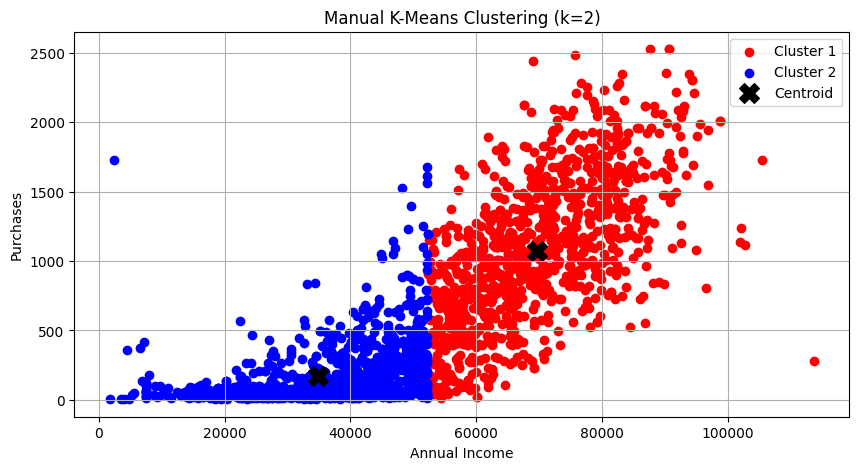

In [59]:
# 5. Visualisasi hasil clustering
colors = ['red', 'blue']
plt.figure(figsize=(10, 5))

for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroid')
plt.xlabel('Annual Income')
plt.ylabel('Purchases')
plt.title('Manual K-Means Clustering (k=2)')
plt.legend()
plt.grid(True)
plt.show()

# Eksperimen

## 1. Segmentasi Pelanggan Umum (RFM & Demografi)

In [60]:
df2 = df.copy()
df2.head()
# df2.info()

,Customer_ID,Birth_Year,Education_Level,Marital_Status,Annual_Income,Kids_at_Home,Teens_at_Home,Customer_Since,Last_Purchase_Days,Spending_Wines,...,Accepted_Campaign_3,Accepted_Campaign_4,Accepted_Campaign_5,Accepted_Campaign_1,Accepted_Campaign_2,Customer_Complaint,Contact_Cost,Revenue_Generated,Last_Campaign_Response,Purchases
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,4,3,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,422


In [61]:
# Hitung umur
df2['Age'] = 2025 - df2['Birth_Year']

# Gabungkan anak-anak
df2['Children'] = df2['Kids_at_Home'] + df2['Teens_at_Home']

# Menghitung total pengeluaran
df2['Total_Spending'] = df2[['Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
                             'Spending_Fish', 'Spending_Sweets', 'Spending_Gold']].sum(axis=1)

# Menghitung total pembelian
df2['Total_Purchases'] = df2[['Deals_Purchases', 'Web_Purchases',
                              'Catalog_Purchases', 'Store_Purchases']].sum(axis=1)

Pasangan fitur dengan korelasi cukup kuat (|r| ≥ 0.4):

- Spending_Meat vs Catalog_Purchases: korelasi = 0.70
- Spending_Wines vs Catalog_Purchases: korelasi = 0.67
- Spending_Wines vs Store_Purchases: korelasi = 0.64
- Spending_Fruits vs Spending_Fish: korelasi = 0.59
- Spending_Meat vs Spending_Fish: korelasi = 0.59
- Spending_Wines vs Spending_Meat: korelasi = 0.59
- Spending_Fish vs Spending_Sweets: korelasi = 0.58
- Spending_Fruits vs Spending_Sweets: korelasi = 0.57
- Spending_Fish vs Catalog_Purchases: korelasi = 0.57
- Spending_Fruits vs Spending_Meat: korelasi = 0.56
- Catalog_Purchases vs Store_Purchases: korelasi = 0.56
- Spending_Meat vs Spending_Sweets: korelasi = 0.54
- Spending_Wines vs Web_Purchases: korelasi = 0.54
- Spending_Sweets vs Catalog_Purchases: korelasi = 0.52
- Kids_at_Home vs Catalog_Purchases: korelasi = -0.52
- Spending_Fruits vs Catalog_Purchases: korelasi = 0.52
- Spending_Meat vs Store_Purchases: korelasi = 0.51
- Kids_at_Home vs Store_Purchases: korel

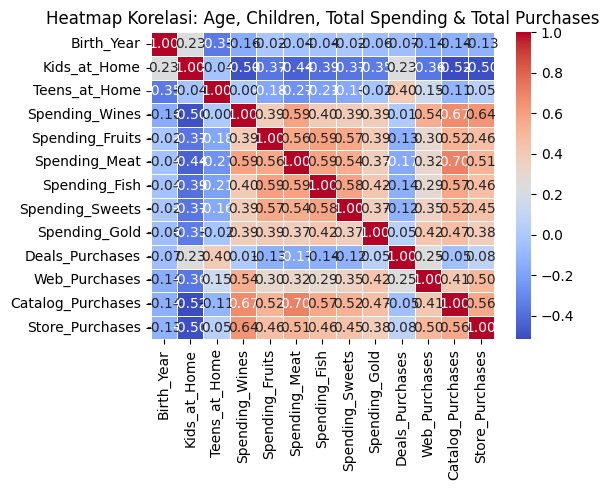

In [62]:
cols = ['Birth_Year', 'Kids_at_Home', 'Teens_at_Home', 'Spending_Wines', 'Spending_Fruits', 'Spending_Meat',
        'Spending_Fish', 'Spending_Sweets', 'Spending_Gold', 'Deals_Purchases', 'Web_Purchases',
        'Catalog_Purchases', 'Store_Purchases']
corr_matrix = df2[cols].corr()

# Tampilkan pasangan fitur dengan korelasi kuat
threshold = 0.4
strong_corrs = []
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        var1 = cols[i]
        var2 = cols[j]
        corr = corr_matrix.loc[var1, var2]
        if abs(corr) >= threshold:
            strong_corrs.append((var1, var2, corr))

strong_corrs = sorted(strong_corrs, key=lambda x: abs(x[2]), reverse=True)

print("Pasangan fitur dengan korelasi cukup kuat (|r| ≥ 0.4):\n")
for var1, var2, corr in strong_corrs:
    print(f"- {var1} vs {var2}: korelasi = {corr:.2f}")

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi: Age, Children, Total Spending & Total Purchases')
plt.tight_layout()
plt.show()

Pasangan fitur dengan korelasi cukup kuat (|r| ≥ 0.4):

- Total_Spending vs Total_Purchases: korelasi = 0.75
- Children vs Total_Spending: korelasi = -0.50


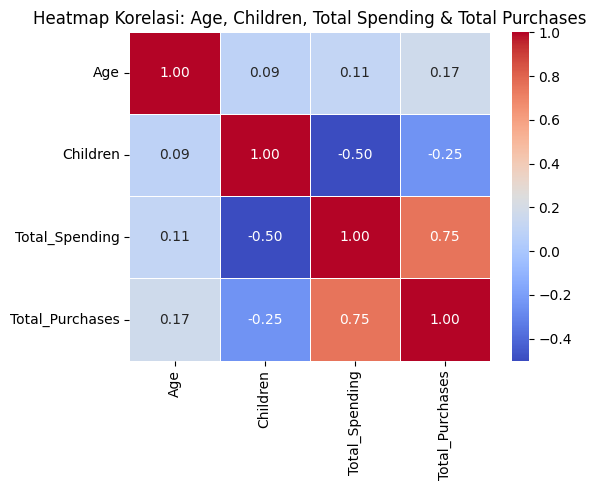

In [63]:
cols = ['Age', 'Children', 'Total_Spending', 'Total_Purchases']
corr_matrix = df2[cols].corr()

# Tampilkan pasangan fitur dengan korelasi kuat
threshold = 0.4
strong_corrs = []
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        var1 = cols[i]
        var2 = cols[j]
        corr = corr_matrix.loc[var1, var2]
        if abs(corr) >= threshold:
            strong_corrs.append((var1, var2, corr))

strong_corrs = sorted(strong_corrs, key=lambda x: abs(x[2]), reverse=True)

print("Pasangan fitur dengan korelasi cukup kuat (|r| ≥ 0.4):\n")
for var1, var2, corr in strong_corrs:
    print(f"- {var1} vs {var2}: korelasi = {corr:.2f}")

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi: Age, Children, Total Spending & Total Purchases')
plt.tight_layout()
plt.show()

In [64]:
# Encoding Education_Level
df2['Education_Level_Encoded'] = df2['Education_Level'].astype('category').cat.codes

# One-hot encoding Marital_Status
df2 = pd.get_dummies(df2, columns=['Marital_Status'], prefix='Marital_Status')

In [65]:
demographic_cols = ['Age', 'Annual_Income', 'Children', 'Education_Level_Encoded']

behavior_cols = [
    'Last_Purchase_Days',       # Recency
    'Total_Spending',           # Monetary
    'Total_Purchases',          # Frequency
    'Web_Visits_Month',
    'Web_Purchases',            # perbaikan dari NumWebPurchases
    'Store_Purchases'           # perbaikan dari NumStorePurchases
]

# Kolom Marital Status hasil one-hot encoding
marital_status_cols = [col for col in df2.columns if 'Marital_Status_' in col]

selected_cols_general = demographic_cols + behavior_cols + marital_status_cols
selected_cols_general = [col for col in selected_cols_general if col in df2.columns]
df_cluster_general = df2[selected_cols_general].copy()

print(f"\nKolom yang digunakan untuk Segmentasi Pelanggan Umum: {selected_cols_general}")
print(f"Jumlah fitur: {len(selected_cols_general)}")



Kolom yang digunakan untuk Segmentasi Pelanggan Umum: ['Age', 'Annual_Income', 'Children', 'Education_Level_Encoded', 'Last_Purchase_Days', 'Total_Spending', 'Total_Purchases', 'Web_Visits_Month', 'Web_Purchases', 'Store_Purchases', 'Marital_Status_0', 'Marital_Status_1', 'Marital_Status_2', 'Marital_Status_3', 'Marital_Status_4', 'Marital_Status_5', 'Marital_Status_6', 'Marital_Status_7']
Jumlah fitur: 18


In [66]:
# --- Standardisasi Data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_general)

print("\nData setelah standardisasi (5 baris pertama):\n", X_scaled[:5])


Data setelah standardisasi (5 baris pertama):
 [[ 0.9837257   0.31546916 -1.2661605  -0.34787539  0.30708091  1.68200203
   1.33048208  0.69094929  1.40669873 -0.55784659 -0.02994764 -0.03668644
  -0.33976798 -0.79247003  1.91049732 -0.58976782 -0.18902608 -0.02994764]
 [ 1.23398319 -0.25713448  1.39492259 -0.34787539 -0.38385114 -0.96222727
  -1.16258455 -0.13729927 -1.11663777 -1.17485035 -0.02994764 -0.03668644
  -0.33976798 -0.79247003  1.91049732 -0.58976782 -0.18902608 -0.02994764]
 [ 0.3163724   0.96968605 -1.2661605  -0.34787539 -0.79841036  0.28338766
   0.80562595 -0.55142354  1.40669873  1.29316469 -0.02994764 -0.03668644
  -0.33976798 -0.79247003 -0.52342392  1.6955825  -0.18902608 -0.02994764]
 [-1.26859167 -1.21348063  0.06438104 -0.34787539 -0.79841036 -0.9189883
  -0.90015649  0.27682501 -0.75616113 -0.55784659 -0.02994764 -0.03668644
  -0.33976798 -0.79247003 -0.52342392  1.6955825  -0.18902608 -0.02994764]
 [-1.01833419  0.32299447  0.06438104  1.43095135  1.55075859

### Silhouette

k	Silhouette Score
2	0.2107
3	0.1557
4	0.1306
5	0.1894
6	0.1753
7	0.1993
8	0.2010
9	0.2352
10	0.2209
11	0.2011
12	0.2045
13	0.2043
14	0.1779
15	0.1689

Nilai k optimal berdasarkan Silhouette Score (manual): 9


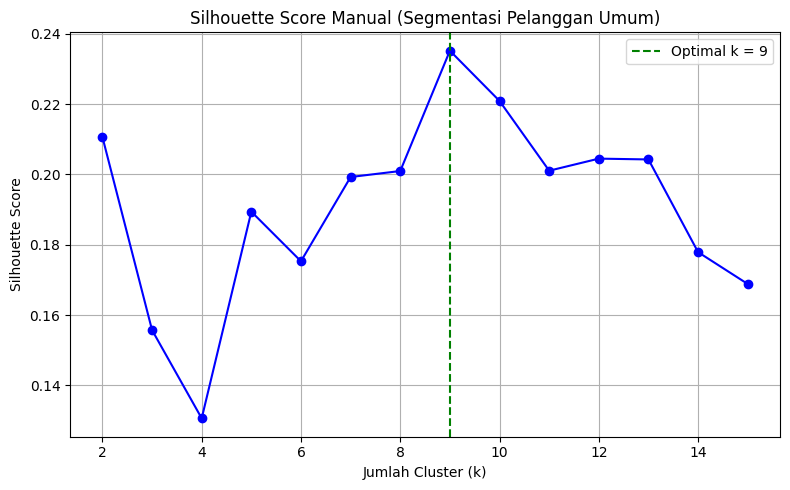

In [67]:
# --- 3. KMeans Manual untuk Silhouette (Return labels dan centroids) ---
def kmeans_with_labels(X, k, max_iter=100):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([
            X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else centroids[i]
            for i in range(k)
        ])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# --- 4. Silhouette Score Manual ---
def silhouette_manual(X, labels):
    n = len(X)
    unique_labels = np.unique(labels)
    silhouette_scores = []

    for i in range(n):
        xi = X[i]
        own_cluster = labels[i]
        same_cluster = (labels == own_cluster)
        same_cluster[i] = False
        a_i = np.mean(np.linalg.norm(xi - X[same_cluster], axis=1)) if np.sum(same_cluster) > 0 else 0

        b_i = np.inf
        for other_label in unique_labels:
            if other_label == own_cluster:
                continue
            other_cluster = (labels == other_label)
            dist_to_other = np.mean(np.linalg.norm(xi - X[other_cluster], axis=1))
            b_i = min(b_i, dist_to_other)

        s_i = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) != 0 else 0
        silhouette_scores.append(s_i)

    return np.mean(silhouette_scores)

# --- 5. Evaluasi Silhouette Score untuk k = 2 s.d. 15 ---
K_range = range(2, 16)
silhouette_vals = []
centroids_all = {}

for k in K_range:
    labels, centroids = kmeans_with_labels(X_scaled, k)
    score = silhouette_manual(X_scaled, labels)
    silhouette_vals.append(score)
    centroids_all[k] = centroids


# --- 6. Visualisasi dan K Optimal ---
print("k\tSilhouette Score")
for k, score in zip(K_range, silhouette_vals):
    print(f"{k}\t{score:.4f}")

k_optimal = K_range[np.argmax(silhouette_vals)]
print(f"\nNilai k optimal berdasarkan Silhouette Score (manual): {k_optimal}")

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_vals, 'bo-')
plt.axvline(k_optimal, color='green', linestyle='--', label=f'Optimal k = {k_optimal}')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Manual (Segmentasi Pelanggan Umum)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Elbow

k	Inertia
1	40176.00
2	32524.36
3	30939.01
4	29202.90
5	27463.82
6	26015.18
7	24913.19
8	23959.72
9	21428.98
10	20815.65
11	20393.00
12	18171.59
13	17735.40
14	19478.53
15	19244.96

Nilai k optimal berdasarkan Elbow Method (manual): 9


<ipython-input-79-3744549780>:50: DeprecationWarning:

Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)



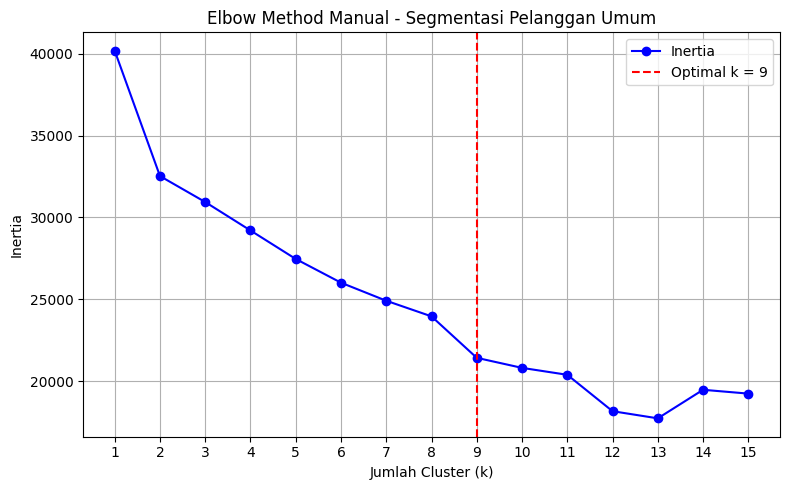

In [79]:
# Fungsi untuk menghitung inertia secara manual
def compute_inertia(X, centroids, labels):
    inertia = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia

# KMeans manual dengan pengembalian inertia
def kmeans_manual(X, k, max_iter=100):
    np.random.seed(42)
    initial_indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[initial_indices]

    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([
            X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else centroids[i]
            for i in range(k)
        ])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    inertia = compute_inertia(X, centroids, labels)
    return inertia

# Hitung inertia untuk berbagai nilai k
K_range = range(1, 16)
inertia_scores = []

for k in K_range:
    inertia = kmeans_manual(X_scaled, k)
    inertia_scores.append(inertia)

# Cetak nilai inertia
print("k\tInertia")
for k, score in zip(K_range, inertia_scores):
    print(f"{k}\t{score:.2f}")

# Fungsi untuk mencari elbow point (jarak maksimum dari garis k1-ke-kN)
def find_elbow_point(ks, inertias):
    p1 = np.array([ks[0], inertias[0]])
    p2 = np.array([ks[-1], inertias[-1]])
    distances = []

    for i in range(len(ks)):
        p = np.array([ks[i], inertias[i]])
        d = np.abs(np.cross(p2 - p1, p1 - p)) / np.linalg.norm(p2 - p1)
        distances.append(d)

    return ks[np.argmax(distances)]

# Temukan nilai k optimal
optimal_k = find_elbow_point(list(K_range), inertia_scores)
print(f"\nNilai k optimal berdasarkan Elbow Method (manual): {optimal_k}")

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_scores, 'bo-', label='Inertia')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method Manual - Segmentasi Pelanggan Umum')
plt.xticks(K_range)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

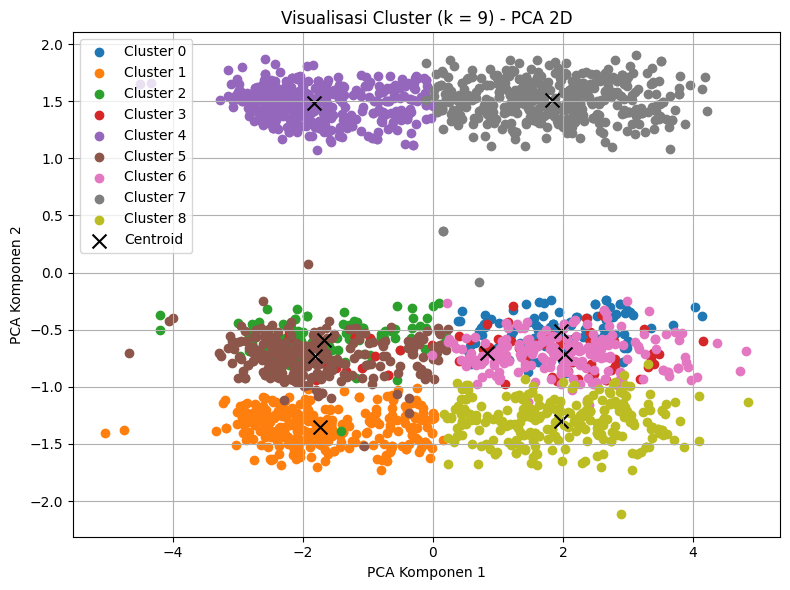

In [80]:
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2D untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Gunakan hasil k optimal dari silhouette
labels_optimal, centroids_optimal = kmeans_with_labels(X_scaled, k_optimal)
centroids_pca = pca.transform(centroids_optimal)

# Visualisasi scatter plot cluster
plt.figure(figsize=(8, 6))
for cluster_id in range(k_optimal):
    plt.scatter(
        X_pca[labels_optimal == cluster_id, 0],
        X_pca[labels_optimal == cluster_id, 1],
        label=f'Cluster {cluster_id}'
    )

# Plot centroid
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='black', marker='x', s=100, label='Centroid')

plt.title(f'Visualisasi Cluster (k = {k_optimal}) - PCA 2D')
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [81]:
import plotly.express as px

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Ambil kembali label dan centroid dari k optimal
labels_optimal, centroids_optimal = kmeans_with_labels(X_scaled, k_optimal)
centroids_pca_3d = pca_3d.transform(centroids_optimal)

# Siapkan DataFrame untuk visualisasi
df_pca = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = labels_optimal.astype(str)  # Ubah ke string agar warnanya diskrit

# Tambahkan nama segmen jika sudah ada
if 'Cluster_Name' in df2.columns:
    df_pca['Segment'] = df2['Cluster_Name']
else:
    df_pca['Segment'] = df_pca['Cluster']

# Plot interaktif dengan Plotly
fig = px.scatter_3d(
    df_pca, x='PC1', y='PC2', z='PC3',
    color='Segment',
    title=f'Visualisasi Cluster 3D (k = {k_optimal})',
    opacity=0.7
)

centroid_df = pd.DataFrame(centroids_pca_3d, columns=['PC1', 'PC2', 'PC3'])
centroid_df['Cluster'] = [f"Centroid {i}" for i in range(k_optimal)]
fig.add_scatter3d(
    x=centroid_df['PC1'],
    y=centroid_df['PC2'],
    z=centroid_df['PC3'],
    mode='markers',
    marker=dict(size=6, color='black', symbol='x'),
    name='Centroid'
)

fig.update_layout(legend_title='Segment / Cluster')
fig.show()

In [82]:
def kmeans_with_labels_verbose(X, k, max_iter=100, tol=1e-4):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for iteration in range(1, max_iter + 1):
        # Hitung jarak ke semua centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

        # Contoh tampilan jarak awal (hanya 5 data pertama dan k centroid)
        print(f"\nIterasi ke-{iteration}:")
        print("Contoh jarak ke centroid (tampilan beberapa data awal)")
        print(np.round(distances[:5], 2))

        # Penetapan label
        labels = np.argmin(distances, axis=1)
        print("\nContoh label klaster berdasarkan jarak minimum:")
        print(labels[:10])

        # Update centroid
        new_centroids = np.array([
            X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])

        # Tampilkan centroid baru
        centroids_str = "■(" + "@".join(
            [f"[{'&'.join(f'{v:.2f}' for v in row)}]" for row in new_centroids]
        ) + ")"
        print("\nCentroid baru setelah update:")
        print(centroids_str)

        # Cek konvergensi
        if np.allclose(centroids, new_centroids, atol=tol):
            print(f"\nIterasi ke-{iteration} (Konvergen): Centroid tidak berubah, proses berhenti.")
            break

        centroids = new_centroids

    return labels, centroids
# Jalankan k-means verbose dan tampilkan proses iterasi
labels_optimal, centroids_optimal = kmeans_with_labels_verbose(X_scaled, k=k_optimal)


Iterasi ke-1:
Contoh jarak ke centroid (tampilan beberapa data awal)
[[5.58 5.51 6.3  6.04 6.35 6.08 4.88 4.95 6.05]
 [6.72 4.64 4.73 4.83 4.56 5.02 7.18 4.81 6.71]
 [4.79 3.75 6.15 4.96 6.34 5.73 2.66 4.47 4.89]
 [6.19 3.95 4.38 4.65 4.02 4.03 5.51 4.81 5.36]
 [4.86 5.41 4.97 4.42 3.22 5.38 5.05 3.76 5.85]]

Contoh label klaster berdasarkan jarak minimum:
[6 4 6 1 4 6 0 4 4 4]

Centroid baru setelah update:
■([-0.03&0.93&-0.62&-0.08&0.41&0.99&0.91&-0.64&0.57&1.01&0.18&-0.04&1.85&-0.63&0.00&-0.59&-0.02&-0.03]@[0.68&0.14&-0.27&-0.02&0.19&-0.02&-0.25&-0.56&-0.35&-0.18&0.08&-0.04&-0.33&-0.77&-0.17&1.21&0.11&-0.03]@[0.12&-0.67&0.49&0.07&-0.07&-0.76&-0.71&0.43&-0.55&-0.71&-0.03&-0.04&2.94&-0.79&-0.52&-0.59&-0.19&-0.03]@[0.31&0.80&-0.71&0.31&-0.72&0.65&0.41&-1.23&-0.18&0.73&-0.03&-0.04&-0.34&0.85&-0.09&-0.59&-0.09&-0.03]@[-0.40&-0.79&0.42&0.40&0.23&-0.82&-0.96&0.59&-0.76&-0.85&-0.03&0.02&-0.34&0.25&0.19&-0.20&-0.03&-0.03]@[-0.65&-1.17&-0.22&-1.34&-0.36&-0.84&-0.96&0.46&-0.77&-0.80&-0.03&0.1

In [83]:
centroids_optimal = centroids_all[k_optimal]
centroid_df = pd.DataFrame(centroids_optimal, columns=selected_cols_general)
centroid_df.index = [f"Cluster {i}" for i in range(k_optimal)]

print("\nNilai Centroid untuk Masing-Masing Klaster (Standardized):\n")
centroid_df.round(2)


Nilai Centroid untuk Masing-Masing Klaster (Standardized):



,Age,Annual_Income,Children,Education_Level_Encoded,Last_Purchase_Days,Total_Spending,Total_Purchases,Web_Visits_Month,Web_Purchases,Store_Purchases,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Marital_Status_4,Marital_Status_5,Marital_Status_6,Marital_Status_7
Cluster 0,0.28,0.82,-0.43,0.01,0.06,0.87,0.91,-0.37,0.76,0.79,0.56,-0.04,2.89,-0.79,-0.52,-0.59,-0.19,-0.03
Cluster 1,-0.04,-0.75,0.42,-0.11,0.09,-0.78,-0.78,0.47,-0.57,-0.73,-0.03,-0.04,-0.34,-0.79,-0.52,1.70,-0.19,-0.03
Cluster 2,0.14,-0.69,0.53,0.02,-0.04,-0.79,-0.75,0.48,-0.57,-0.73,-0.03,-0.04,2.94,-0.79,-0.52,-0.59,-0.19,-0.03
Cluster 3,0.85,0.23,-0.11,0.22,0.00,0.22,0.24,-0.19,0.19,0.19,-0.03,-0.04,-0.34,-0.79,-0.52,-0.59,5.29,-0.03
Cluster 4,-0.28,-0.78,0.37,-0.14,-0.05,-0.81,-0.81,0.48,-0.62,-0.73,-0.03,-0.04,-0.34,1.26,-0.52,-0.59,-0.19,-0.03
Cluster 5,-0.32,-0.79,0.36,-0.08,-0.01,-0.77,-0.75,0.53,-0.57,-0.73,-0.03,0.16,-0.34,-0.79,1.89,-0.59,-0.19,-0.03
Cluster 6,-0.10,0.94,-0.71,0.07,0.03,0.99,0.78,-0.73,0.55,0.82,-0.03,-0.04,-0.34,-0.79,1.91,-0.59,-0.19,-0.03
Cluster 7,0.16,0.79,-0.33,0.15,-0.02,0.78,0.86,-0.45,0.66,0.80,-0.03,0.03,-0.34,1.25,-0.52,-0.59,-0.19,0.13
Cluster 8,0.23,0.85,-0.40,0.08,-0.01,0.89,0.88,-0.57,0.65,0.79,-0.03,-0.04,-0.34,-0.79,-0.52,1.70,-0.19,-0.03


In [84]:
# Ambil centroid dari k optimal
centroids_optimal = centroids_all[k_optimal]

# Inverse transform *seluruh* array centroid_optimal
# scaler was fitted on the full X_scaled which had all 18 columns
centroid_original = scaler.inverse_transform(centroids_optimal)

# Buat DataFrame dari centroid yang sudah di-inverse transform
# Gunakan nama kolom asli dari data yang digunakan untuk clustering
centroid_original_df = pd.DataFrame(centroid_original, columns=selected_cols_general)
centroid_original_df.index = [f"Cluster {i}" for i in range(k_optimal)]

# Sekarang, pilih hanya kolom numerik yang diinginkan untuk ditampilkan
cols_scaled_only = demographic_cols + behavior_cols
# Filter DataFrame berdasarkan kolom yang diinginkan
centroid_numeric_df = centroid_original_df[cols_scaled_only]


print("\nCentroid tiap klaster (nilai asli, kolom numerik saja):")
print(centroid_numeric_df.round(2))


Centroid tiap klaster (nilai asli, kolom numerik saja):
             Age  Annual_Income  Children  Education_Level_Encoded  \
Cluster 0  59.54       68455.19      0.63                     2.40   
Cluster 1  55.78       36121.60      1.27                     2.26   
Cluster 2  57.87       37348.37      1.35                     2.41   
Cluster 3  66.44       56426.56      0.87                     2.64   
Cluster 4  52.83       35543.97      1.23                     2.24   
Cluster 5  52.32       35402.03      1.22                     2.30   
Cluster 6  54.97       71093.90      0.42                     2.47   
Cluster 7  58.13       67854.30      0.70                     2.56   
Cluster 8  59.02       69056.79      0.65                     2.48   

           Last_Purchase_Days  Total_Spending  Total_Purchases  \
Cluster 0               50.97         1126.39            21.78   
Cluster 1               51.68          138.42             8.89   
Cluster 2               47.86          131.3

In [85]:
labels_optimal, centroids_optimal = kmeans_with_labels(X_scaled, k_optimal)

centroids_all[k_optimal] = centroids_optimal

df2['Cluster'] = labels_optimal
cluster_summary = df2.groupby('Cluster')[selected_cols_general].mean().round(2)
print("\nRingkasan Rata-rata Fitur per Klaster:")
display(cluster_summary)


Ringkasan Rata-rata Fitur per Klaster:


,Age,Annual_Income,Children,Education_Level_Encoded,Last_Purchase_Days,Total_Spending,Total_Purchases,Web_Visits_Month,Web_Purchases,Store_Purchases,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Marital_Status_4,Marital_Status_5,Marital_Status_6,Marital_Status_7
Cluster,,,,,,,,,,,,,,,,,,
0,59.54,68455.19,0.63,2.40,50.97,1126.39,21.78,4.43,6.22,8.36,0.02,0.00,0.98,0.00,0.00,0.0,0.0,0.0
1,55.78,36121.60,1.27,2.26,51.68,138.42,8.89,6.47,2.51,3.45,0.00,0.00,0.00,0.00,0.00,1.0,0.0,0.0
2,57.87,37348.37,1.35,2.41,47.86,131.39,9.17,6.48,2.50,3.45,0.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0
3,66.44,56426.56,0.87,2.64,49.14,738.82,16.70,4.88,4.62,6.42,0.00,0.00,0.00,0.00,0.00,0.0,1.0,0.0
4,52.83,35543.97,1.23,2.24,47.70,121.23,8.69,6.50,2.38,3.43,0.00,0.00,0.00,1.00,0.00,0.0,0.0,0.0
5,52.32,35402.03,1.22,2.30,48.89,145.03,9.12,6.61,2.51,3.44,0.00,0.01,0.00,0.00,0.99,0.0,0.0,0.0
6,54.97,71093.90,0.42,2.47,50.07,1199.05,20.82,3.56,5.61,8.47,0.00,0.00,0.00,0.00,1.00,0.0,0.0,0.0
7,58.13,67854.30,0.70,2.56,48.52,1075.98,21.44,4.24,5.93,8.41,0.00,0.00,0.00,0.99,0.00,0.0,0.0,0.0
8,59.02,69056.79,0.65,2.48,48.69,1139.07,21.55,3.95,5.89,8.38,0.00,0.00,0.00,0.00,0.00,1.0,0.0,0.0


Deskripsi:

| Cluster | Segmentasi yang Direkomendasikan           | Karakteristik Utama                                                                                                                 |
| ------- | ------------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------- |
| 0       | **High-Value Divorced Seniors**            | Usia tinggi (59+), pengeluaran & pembelian sangat tinggi, hampir semua status "Divorced", income cukup tinggi                       |
| 1       | **Low-Income Traditional Families**        | Anak 1+, income rendah (\~36k), spending & purchases rendah, mostly "Together", usia sedang (\~55)                                  |
| 2       | **Low-Value Divorced Households**          | Income rendah, pengeluaran rendah, mostly "Divorced", usia \~57                                                                     |
| 3       | **Older Widowed Middle-Class**             | Usia paling tua (\~66), income menengah, pengeluaran sedang, mostly "Widow", pembelian lumayan                                      |
| 4       | **Young Married Families with Low Income** | Usia muda (\~52), mostly "Married", pengeluaran rendah, income paling rendah                                                        |
| 5       | **Young Singles with Modest Activity**     | Usia termuda (\~52), status "Single", income rendah, pengeluaran rendah, web visits tertinggi                                       |
| 6       | **Affluent Digital Shoppers (Single)**     | Income paling tinggi (\~71k), pengeluaran tinggi, pembelian banyak, mostly "Single", web visit rendah (lebih ke pembelian langsung) |
| 7       | **High-Income Married Shoppers**           | Income tinggi (\~68k), pengeluaran & pembelian tinggi, mostly "Married", usia \~58                                                  |
| 8       | **High-Income Widowed Shoppers**           | Income tinggi (\~69k), pengeluaran & pembelian tinggi, mostly "Widow", usia \~59                                                    |


In [86]:
cluster_names = {
    0: "High-Value Divorced Seniors",
    1: "Low-Income Traditional Families",
    2: "Low-Value Divorced Households",
    3: "Older Widowed Middle-Class",
    4: "Young Married Families with Low Income",
    5: "Young Singles with Modest Activity",
    6: "Affluent Digital Shoppers (Single)",
    7: "High-Income Married Shoppers",
    8: "High-Income Widowed Shoppers"
}

# --- 2. Buat kolom baru berisi nama segmen ---
df2['Segment'] = df2['Cluster'].map(cluster_names)
df2

,Customer_ID,Birth_Year,Education_Level,Annual_Income,Kids_at_Home,Teens_at_Home,Customer_Since,Last_Purchase_Days,Spending_Wines,Spending_Fruits,...,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Marital_Status_4,Marital_Status_5,Marital_Status_6,Marital_Status_7,Cluster,Segment
0,5524,1957,2,58138.0,0,0,04-09-2012,58,635,88,...,False,False,False,False,True,False,False,False,6,Affluent Digital Shoppers (Single)
1,2174,1954,2,46344.0,1,1,08-03-2014,38,11,1,...,False,False,False,False,True,False,False,False,5,Young Singles with Modest Activity
2,4141,1965,2,71613.0,0,0,21-08-2013,26,426,49,...,False,False,False,False,False,True,False,False,8,High-Income Widowed Shoppers
3,6182,1984,2,26646.0,1,0,10-02-2014,26,11,4,...,False,False,False,False,False,True,False,False,1,Low-Income Traditional Families
4,5324,1981,4,58293.0,1,0,19-01-2014,94,173,43,...,False,False,False,True,False,False,False,False,7,High-Income Married Shoppers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,61223.0,0,1,13-06-2013,46,709,43,...,False,False,False,True,False,False,False,False,7,High-Income Married Shoppers
2236,4001,1946,4,64014.0,2,1,10-06-2014,56,406,0,...,False,False,False,False,False,True,False,False,8,High-Income Widowed Shoppers
2237,7270,1981,2,56981.0,0,0,25-01-2014,91,908,48,...,False,False,True,False,False,False,False,False,0,High-Value Divorced Seniors
2238,8235,1956,3,69245.0,0,1,24-01-2014,8,428,30,...,False,False,False,False,False,True,False,False,8,High-Income Widowed Shoppers


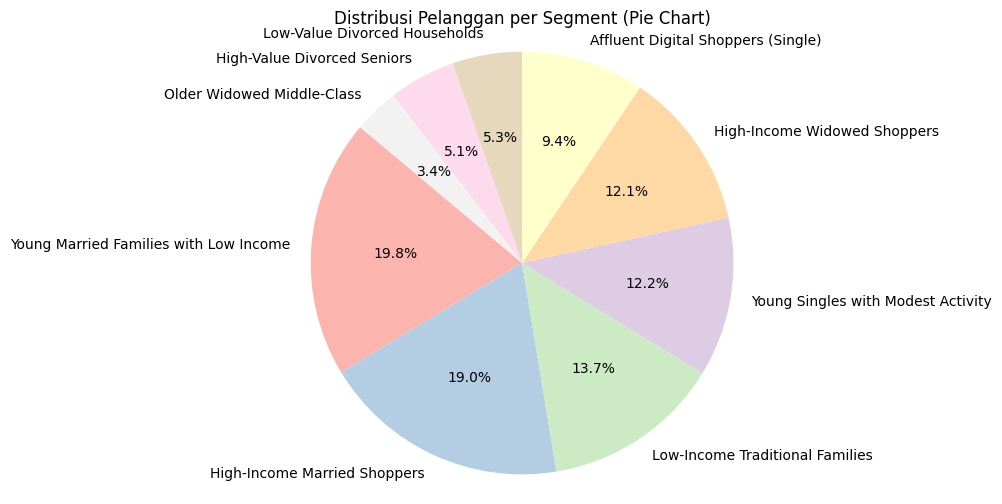

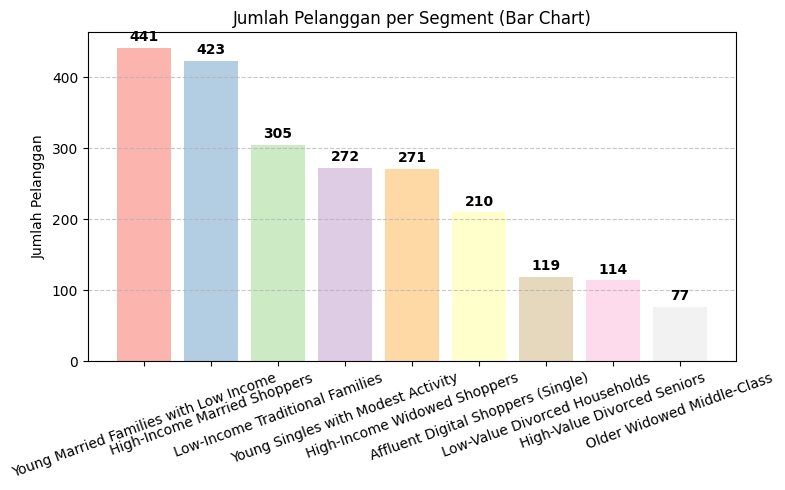

In [88]:
# --- Hitung jumlah pelanggan per segment ---
segment_counts = df2['Segment'].value_counts()

# --- Pie Chart ---
plt.figure(figsize=(6, 6))
colors = plt.cm.Pastel1(range(len(segment_counts)))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribusi Pelanggan per Segment (Pie Chart)')
plt.axis('equal')
plt.show()

# --- Bar Chart ---
plt.figure(figsize=(8, 5))
bars = plt.bar(segment_counts.index, segment_counts.values, color=colors)
plt.title('Jumlah Pelanggan per Segment (Bar Chart)')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()